<h1 align="center">TCI Project (Maintenance) </h1>
<h4 align="center">Summer 2024</h4>


<h4 align="center">Project Phase 1</h4>


# Lybraries

In [ ]:
# Import necessary libraries
import pandas as pd
import requests
from google.colab import files
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay

In [ ]:
pip install matplotlib seaborn scikit-learn

# **PART 1 [Plots]**

## upload data

In [ ]:
# Upload the Excel file
uploaded = files.upload()

Saving Final_Tickets.xlsx to Final_Tickets.xlsx


In [ ]:
# Load the Excel file
file_path = 'Final_Tickets.xlsx'
df = pd.read_excel(file_path)

## MTTR by ROOTCAUSE

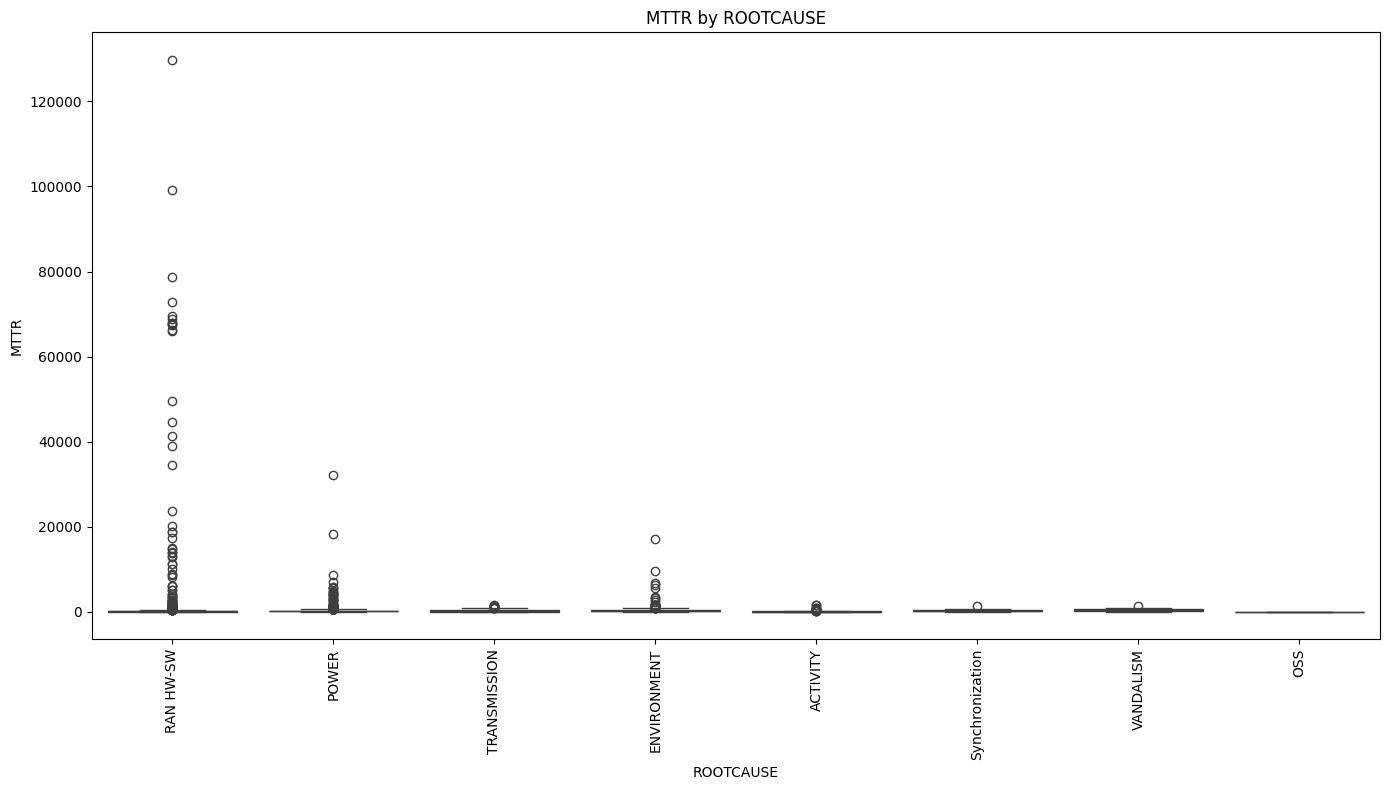

In [ ]:
operator_column = 'ROOTCAUSE'
mttr_column = 'MTTR'

# Drop rows with missing data in the relevant columns
df = df.dropna(subset=[operator_column, mttr_column])

# Plot MTTR by OPERATORNAMEPROVINCE
plt.figure(figsize=(14, 8))
sns.boxplot(x=operator_column, y=mttr_column, data=df)
plt.xticks(rotation=90)

# Add titles and labels
plt.title('MTTR by ROOTCAUSE')
plt.xlabel('ROOTCAUSE')
plt.ylabel('MTTR')

# Show the plot
plt.tight_layout()
plt.show()

## MTTR by SUBCAUSE

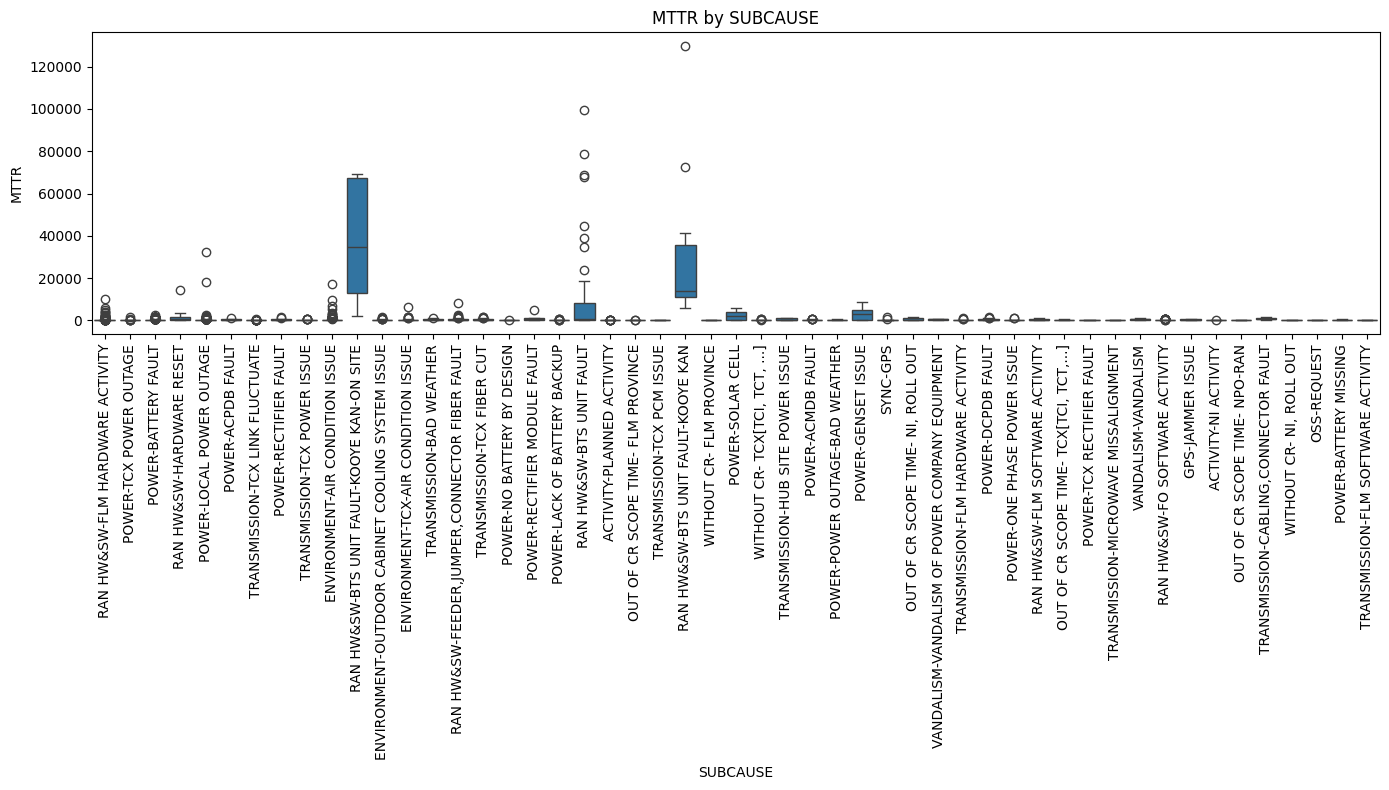

In [ ]:
operator_column = 'SUBCAUSE'
mttr_column = 'MTTR'

# Drop rows with missing data in the relevant columns
df = df.dropna(subset=[operator_column, mttr_column])

# Plot MTTR by OPERATORNAMEPROVINCE
plt.figure(figsize=(14, 8))
sns.boxplot(x=operator_column, y=mttr_column, data=df)
plt.xticks(rotation=90)

# Add titles and labels
plt.title('MTTR by SUBCAUSE')
plt.xlabel('SUBCAUSE')
plt.ylabel('MTTR')

# Show the plot
plt.tight_layout()
plt.show()

## MTTR by SEVERITY

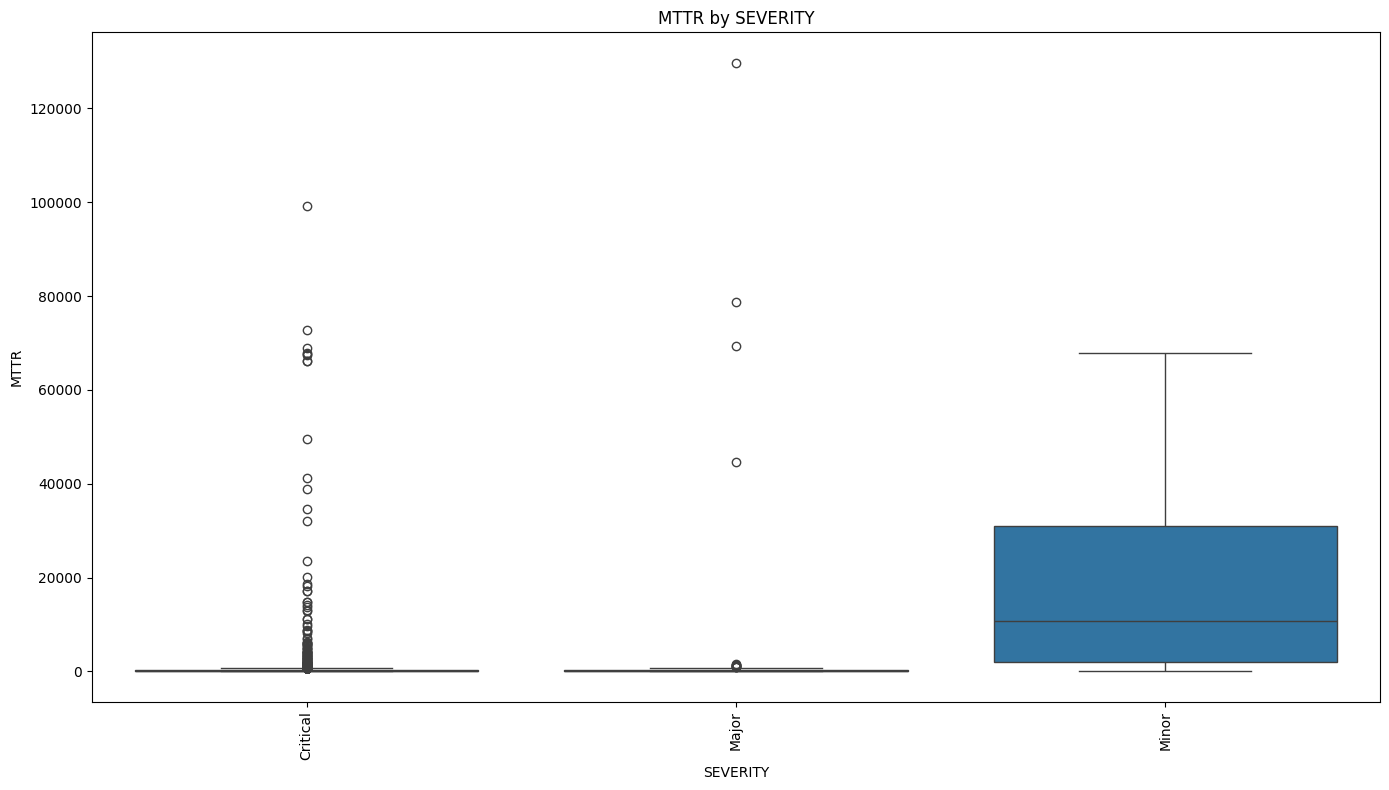

In [ ]:
operator_column = 'SEVERITY'  # Replace with the actual operator column name
mttr_column = 'MTTR'

# Drop rows with missing data in the relevant columns
df = df.dropna(subset=[operator_column, mttr_column])

# Plot MTTR by OPERATORNAMEPROVINCE
plt.figure(figsize=(14, 8))
sns.boxplot(x=operator_column, y=mttr_column, data=df)
plt.xticks(rotation=90)

# Add titles and labels
plt.title('MTTR by SEVERITY')
plt.xlabel('SEVERITY')
plt.ylabel('MTTR')

# Show the plot
plt.tight_layout()
plt.show()

## MTTR by OPERATORNAMEPROVINCE

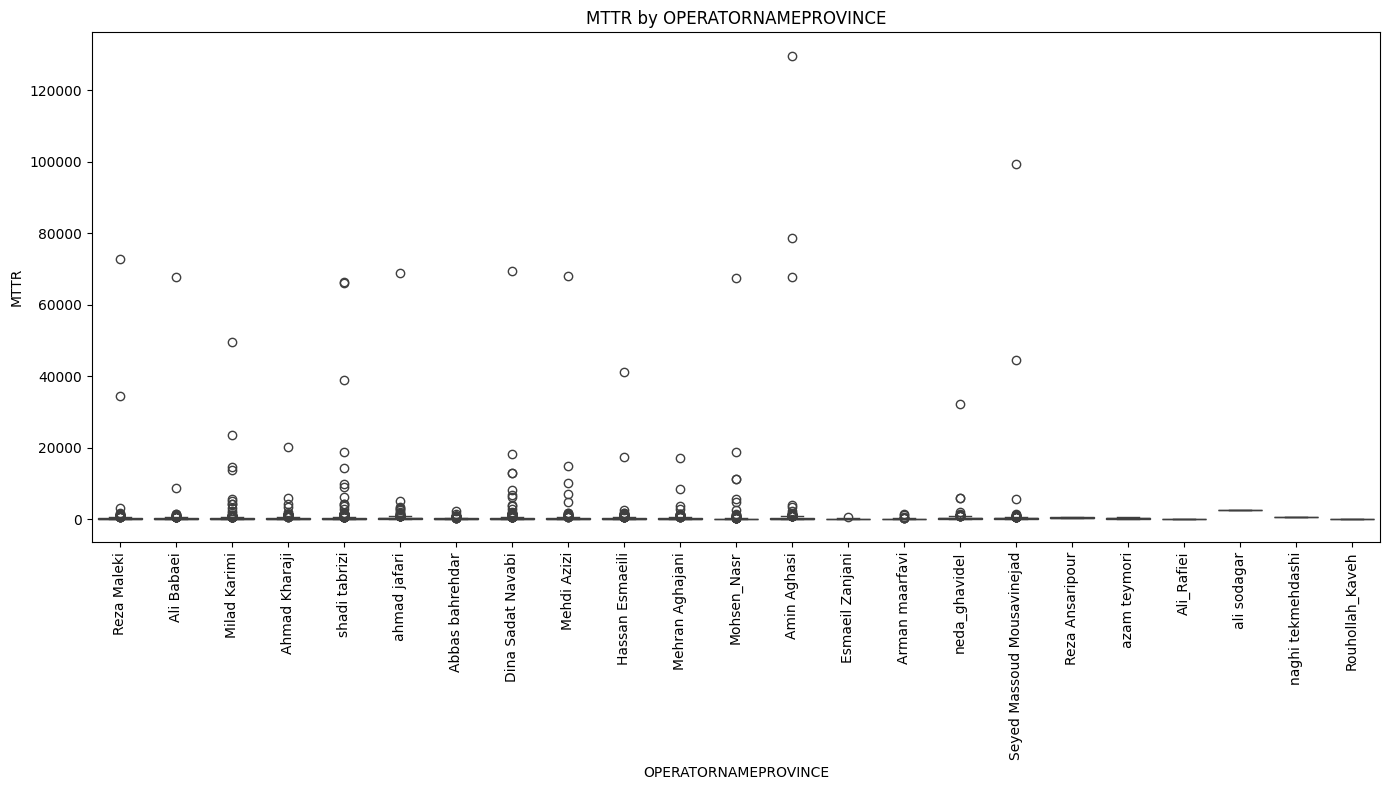

In [ ]:
operator_column = 'OPERATORNAMEPROVINCE'  # Replace with the actual operator column name
mttr_column = 'MTTR'

# Drop rows with missing data in the relevant columns
df = df.dropna(subset=[operator_column, mttr_column])

# Plot MTTR by OPERATORNAMEPROVINCE
plt.figure(figsize=(14, 8))
sns.boxplot(x=operator_column, y=mttr_column, data=df)
plt.xticks(rotation=90)

# Add titles and labels
plt.title('MTTR by OPERATORNAMEPROVINCE')
plt.xlabel('OPERATORNAMEPROVINCE')
plt.ylabel('MTTR')

# Show the plot
plt.tight_layout()
plt.show()

## MTTR vs Quantized Time Index for each operator

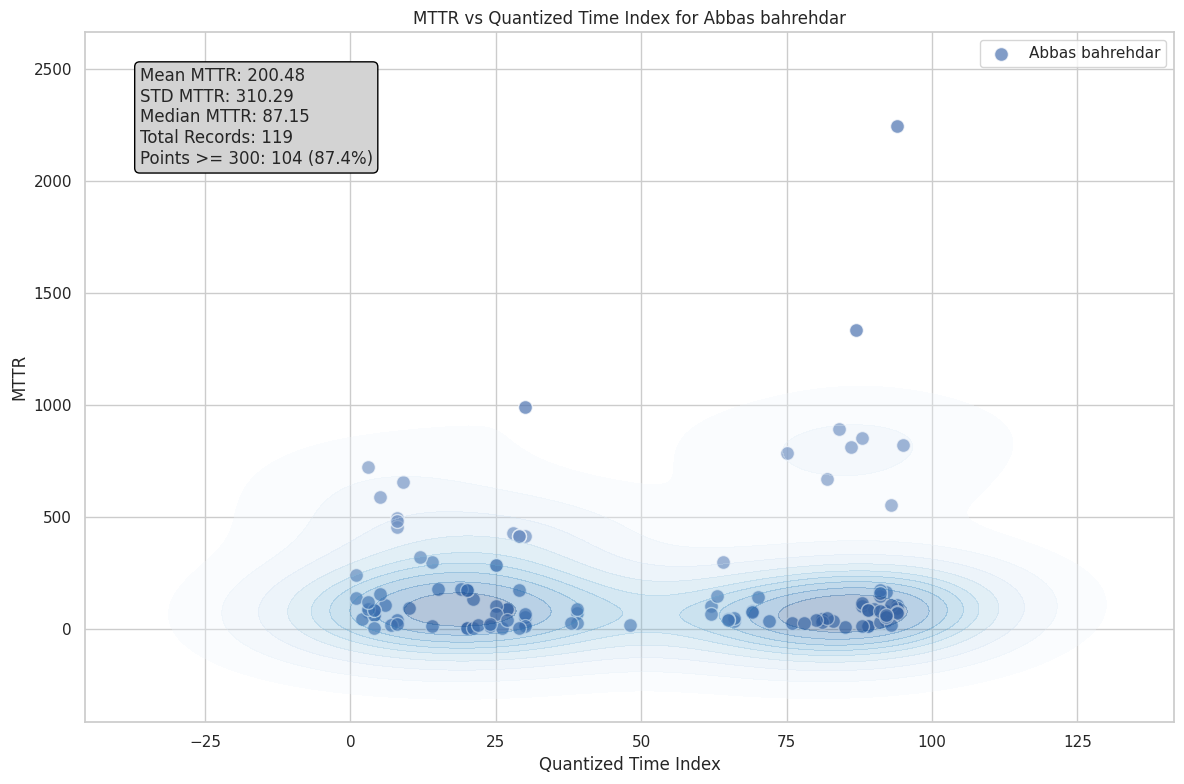

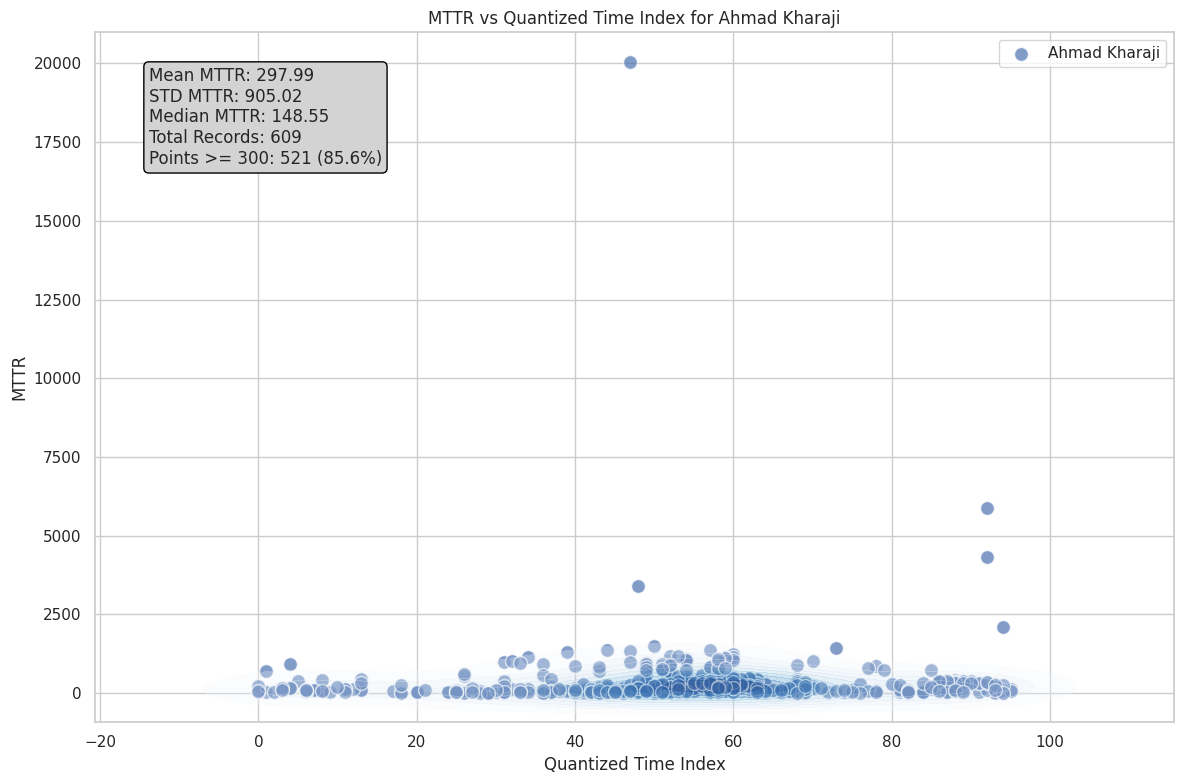

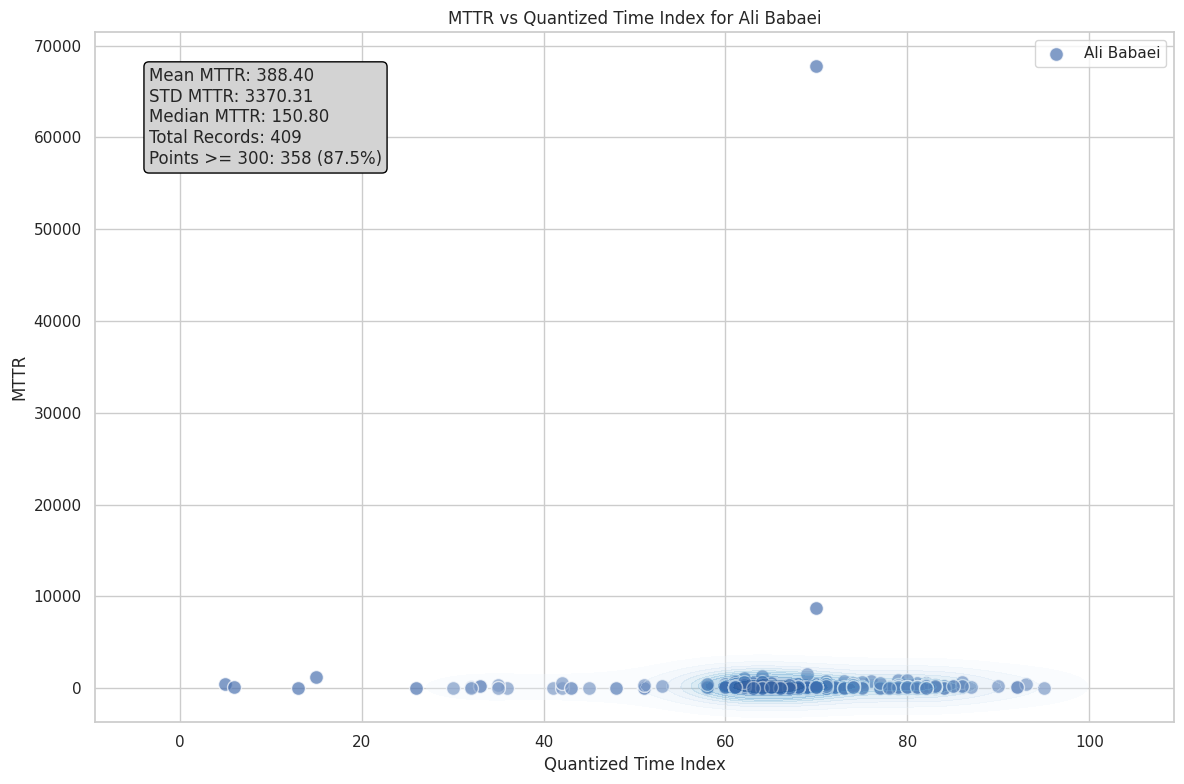

<ipython-input-27-7be23ce7ce20>:27: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=group['Quantized Time Index'], y=group['MTTR'], fill=True, cmap='Blues', alpha=0.3)


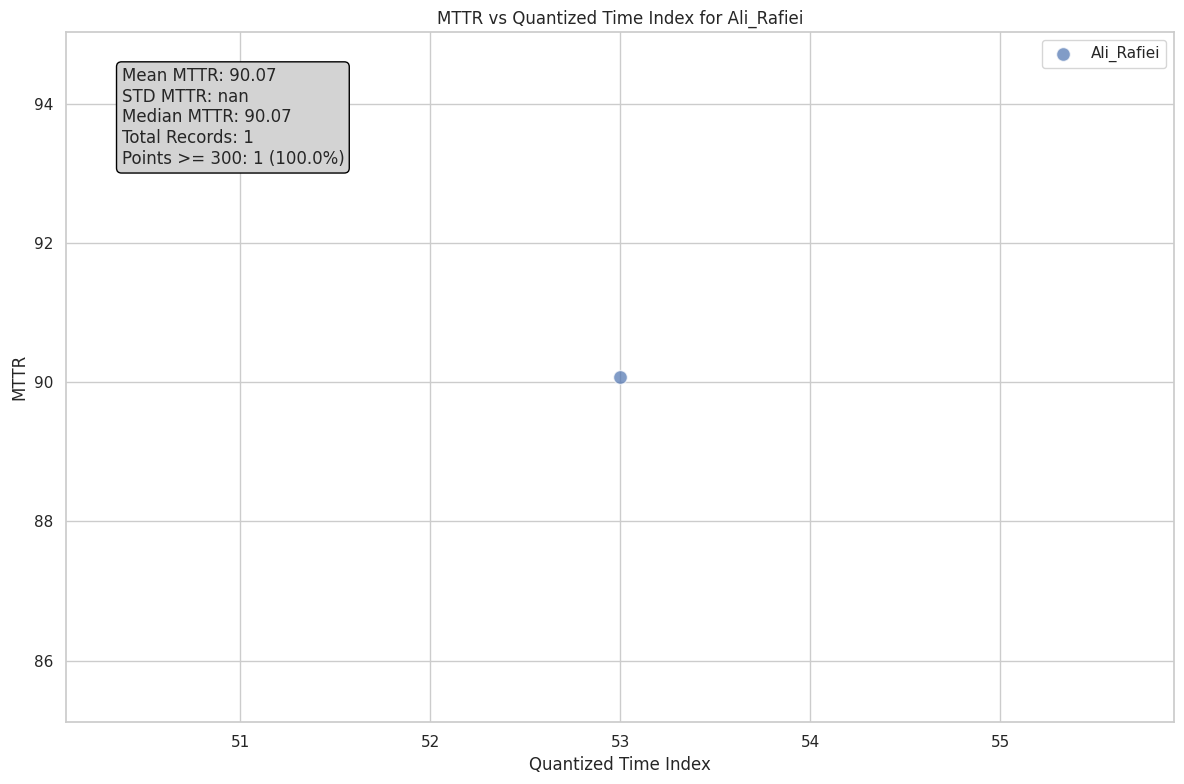

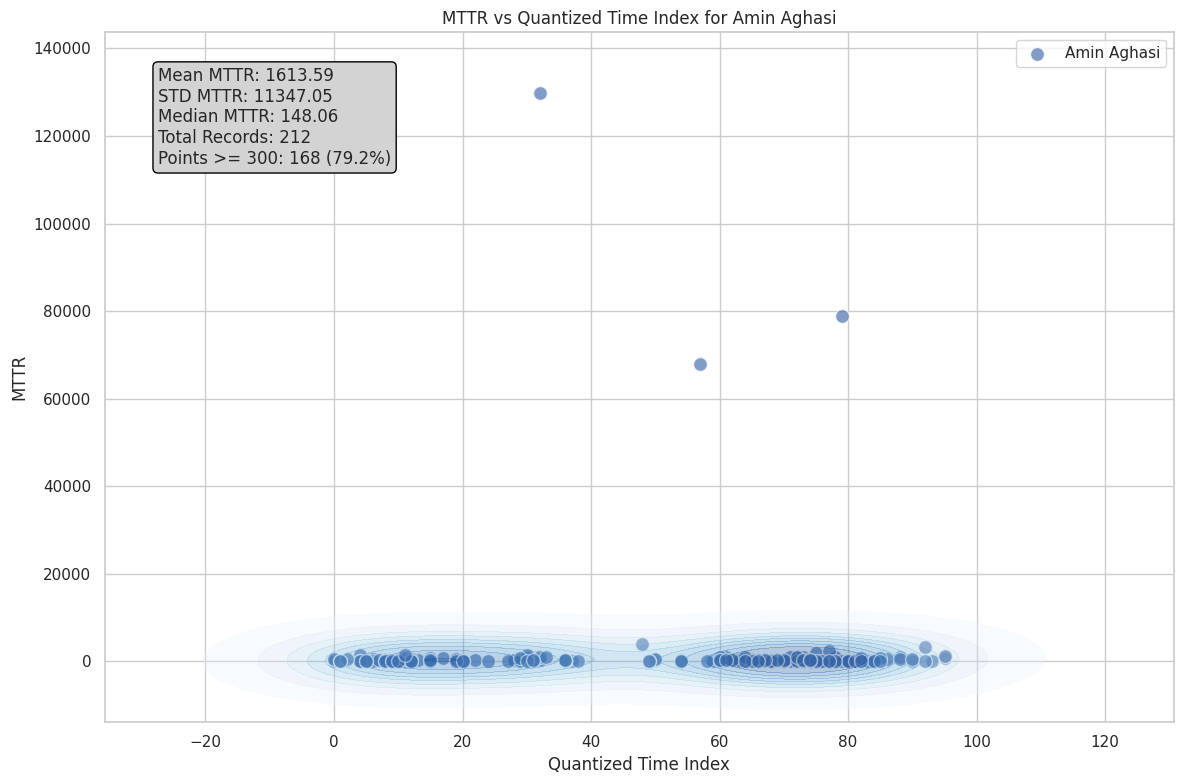

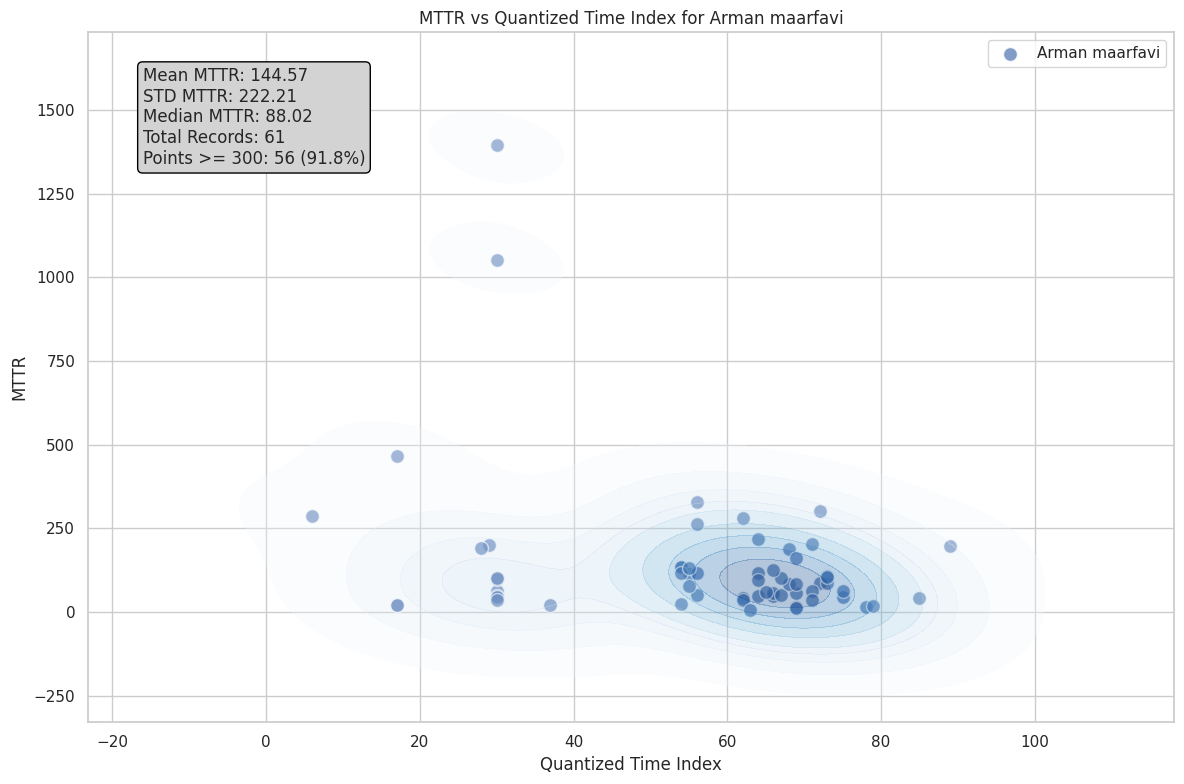

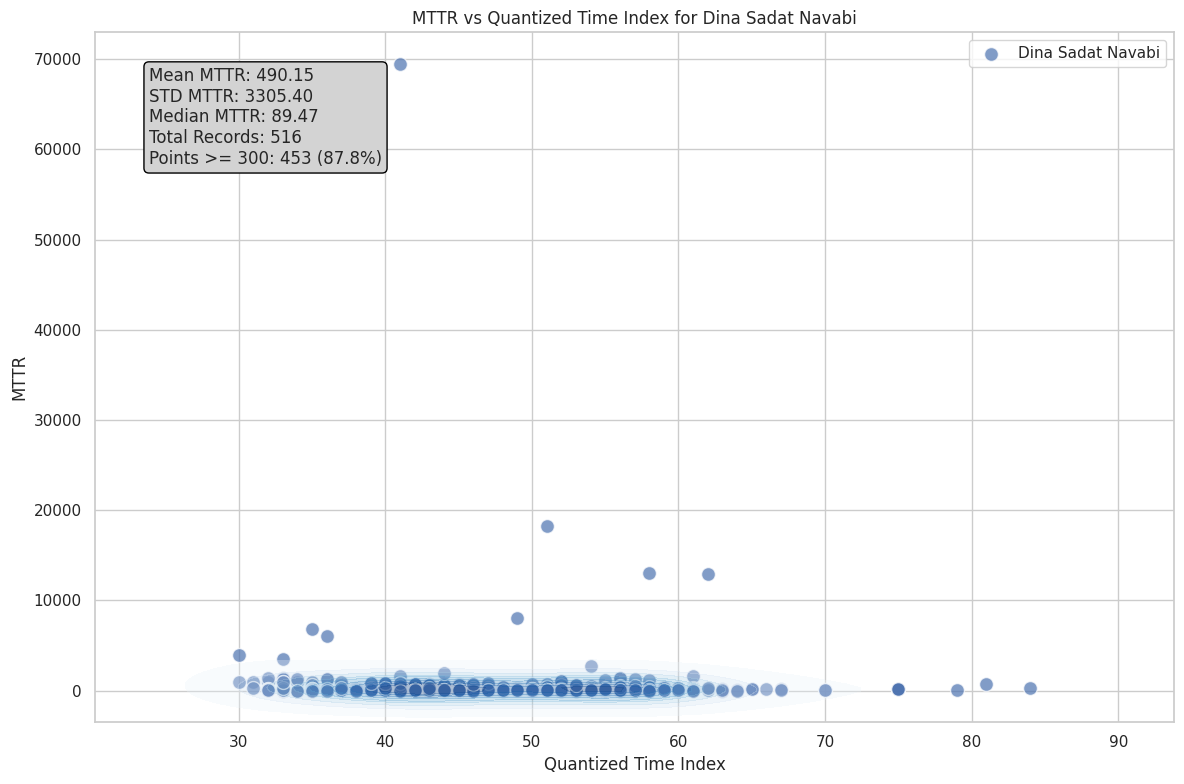

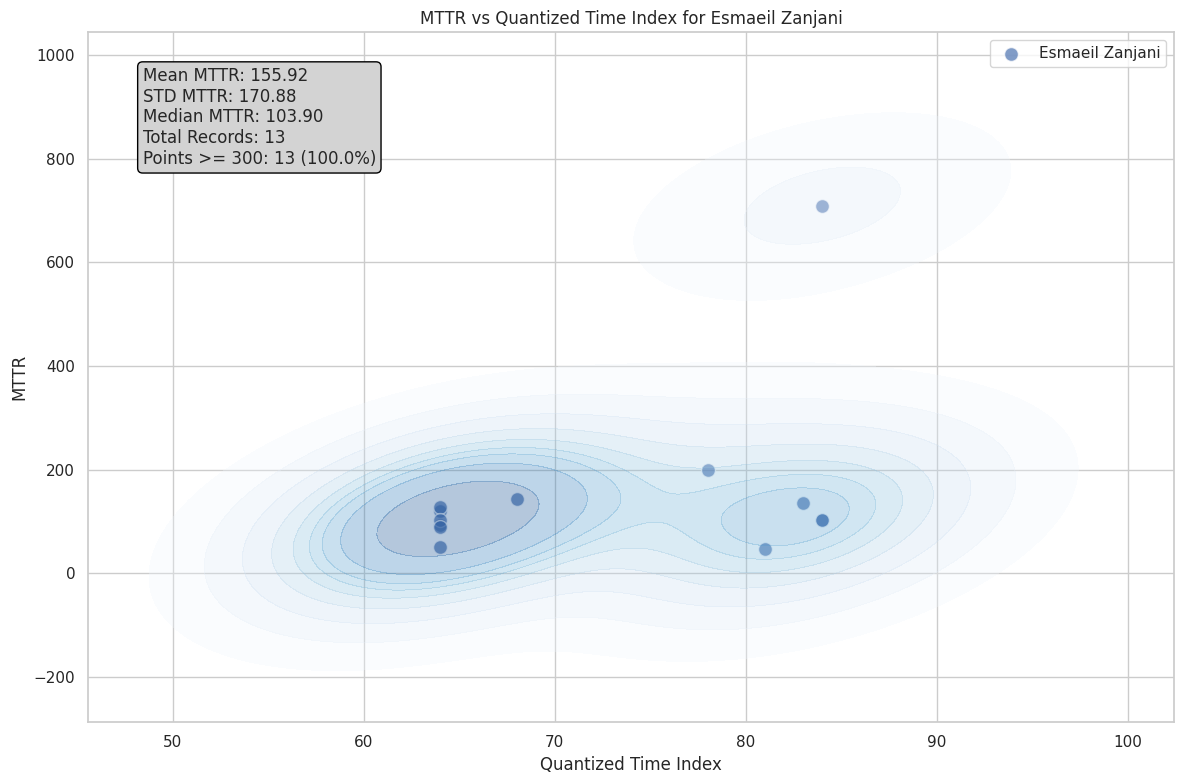

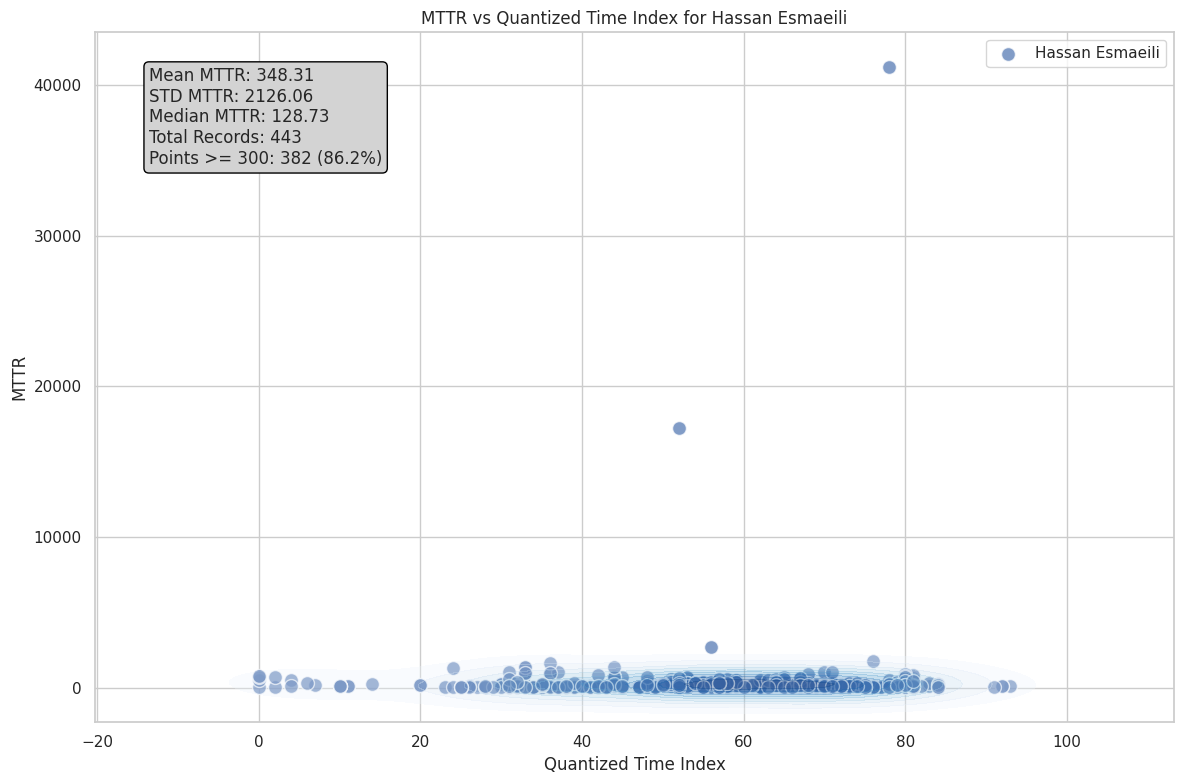

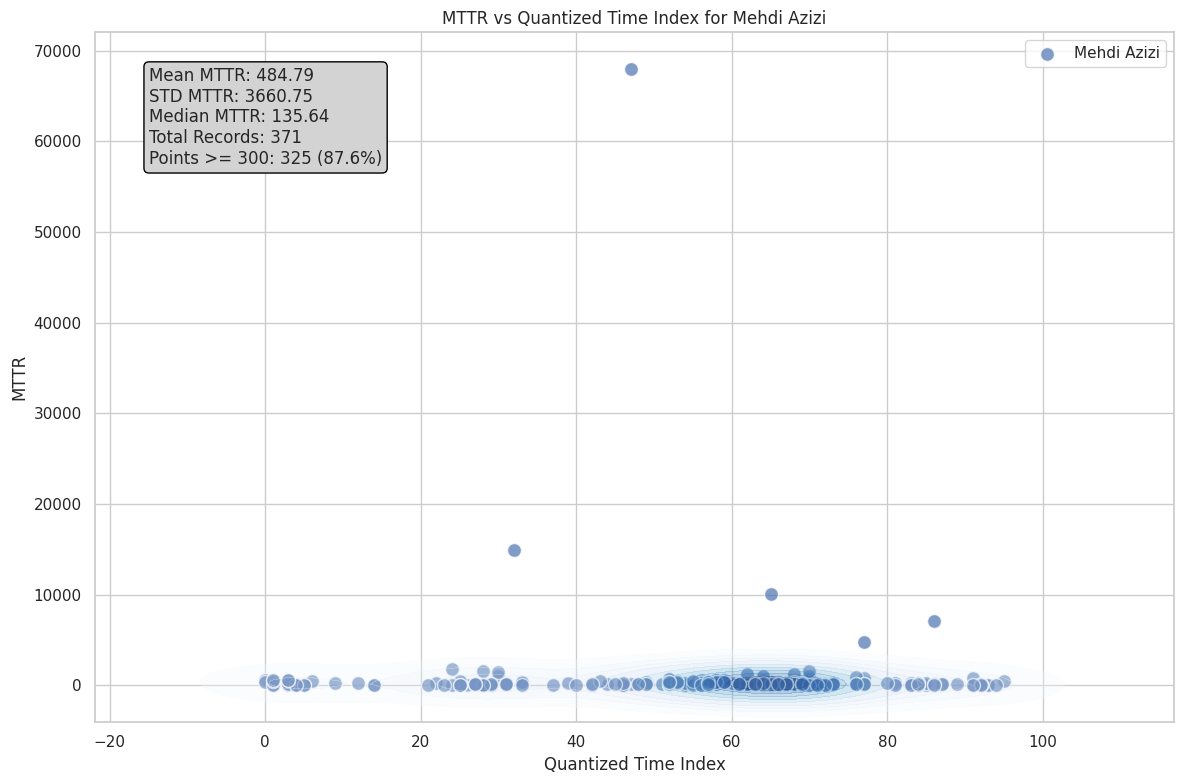

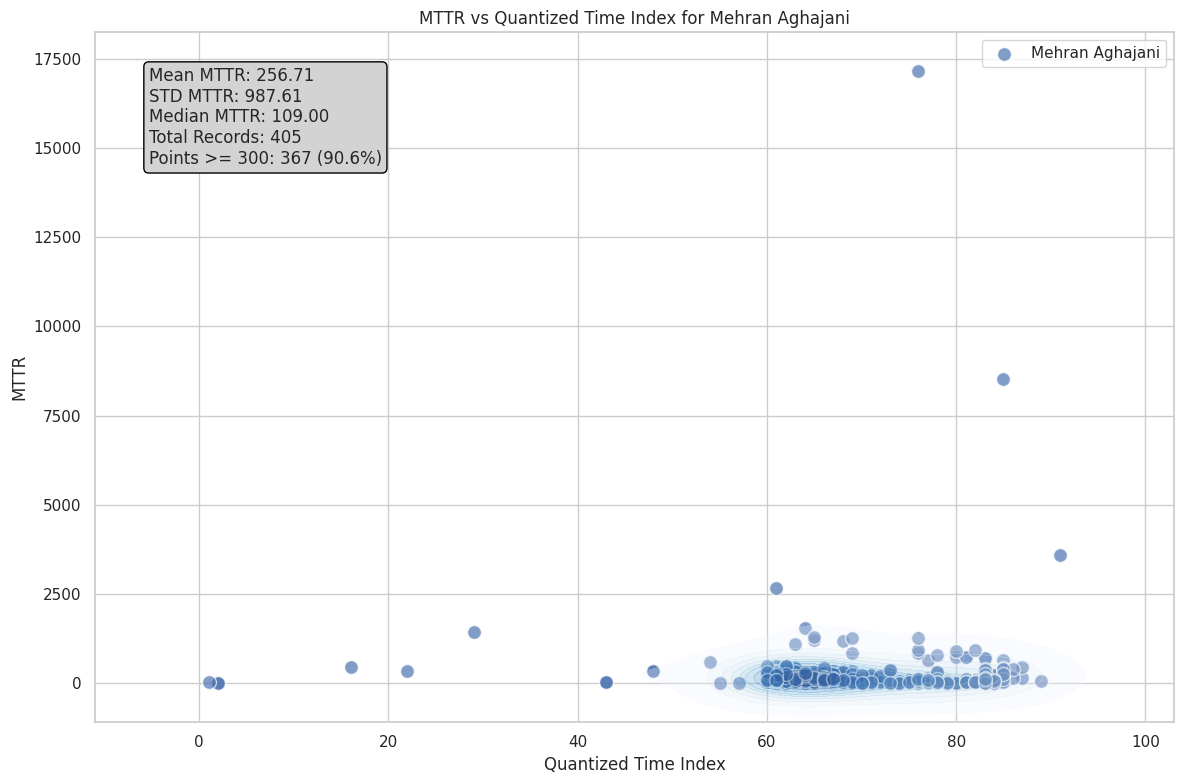

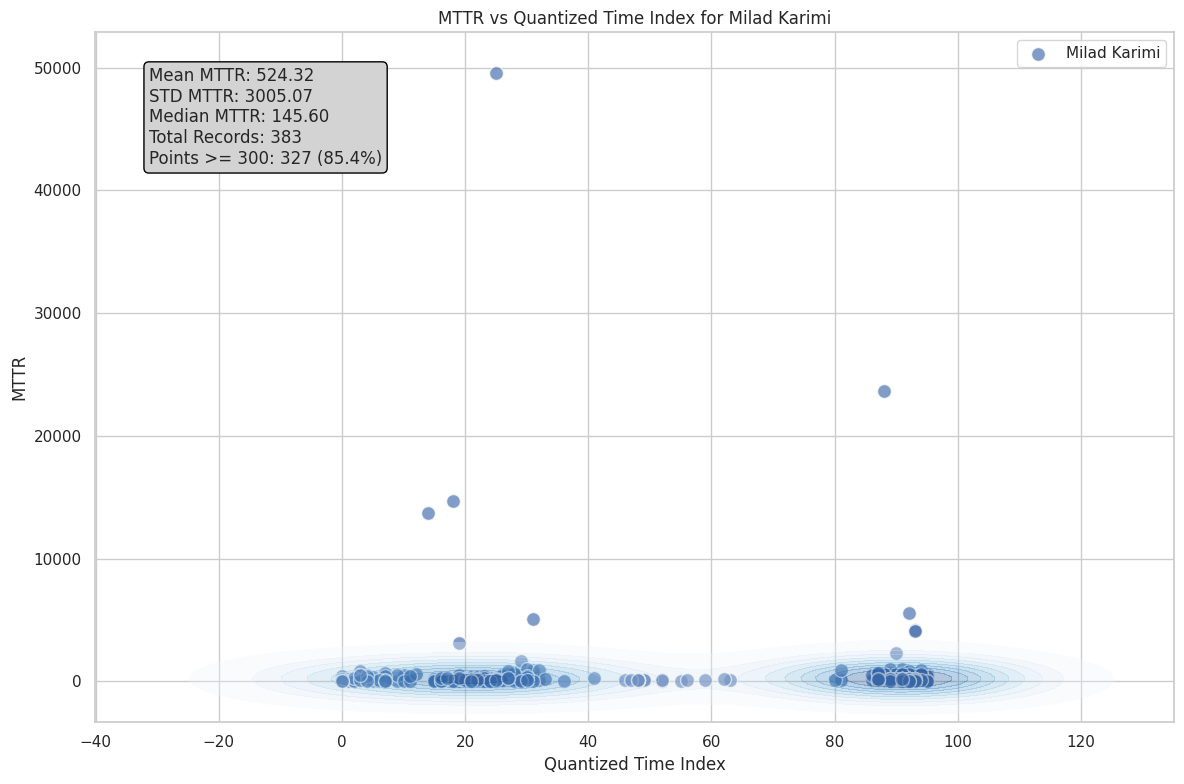

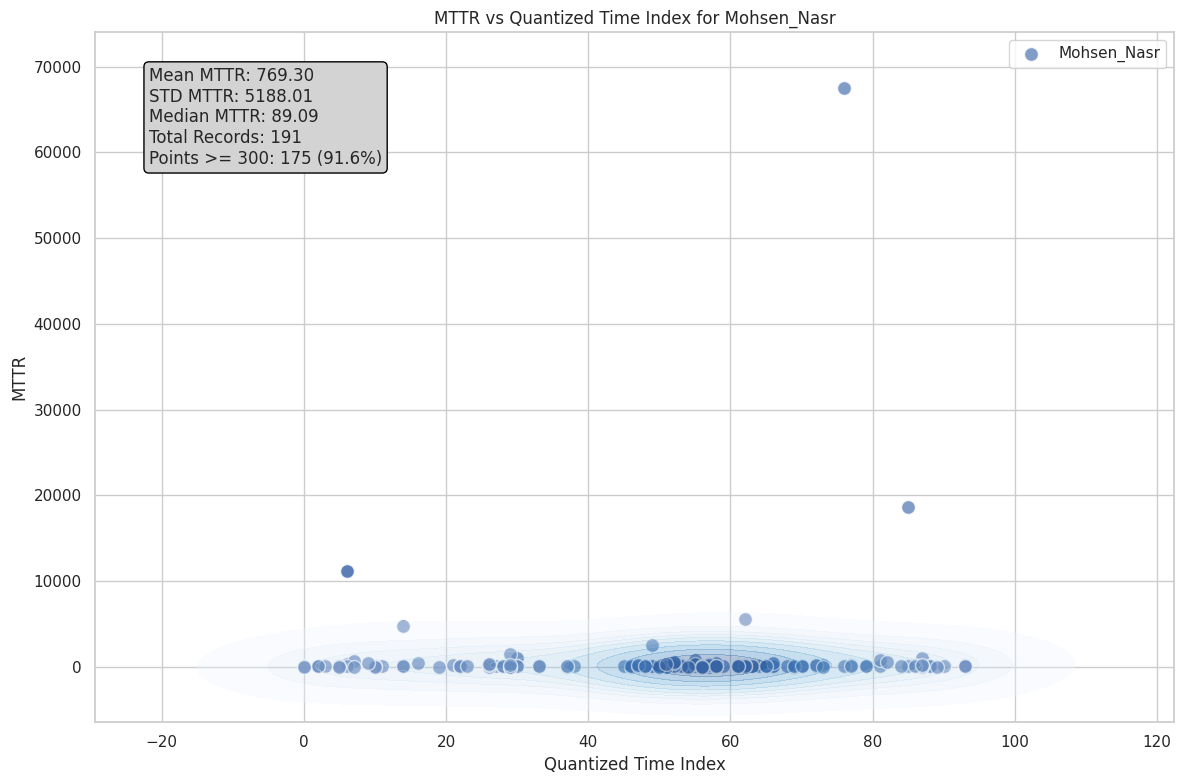

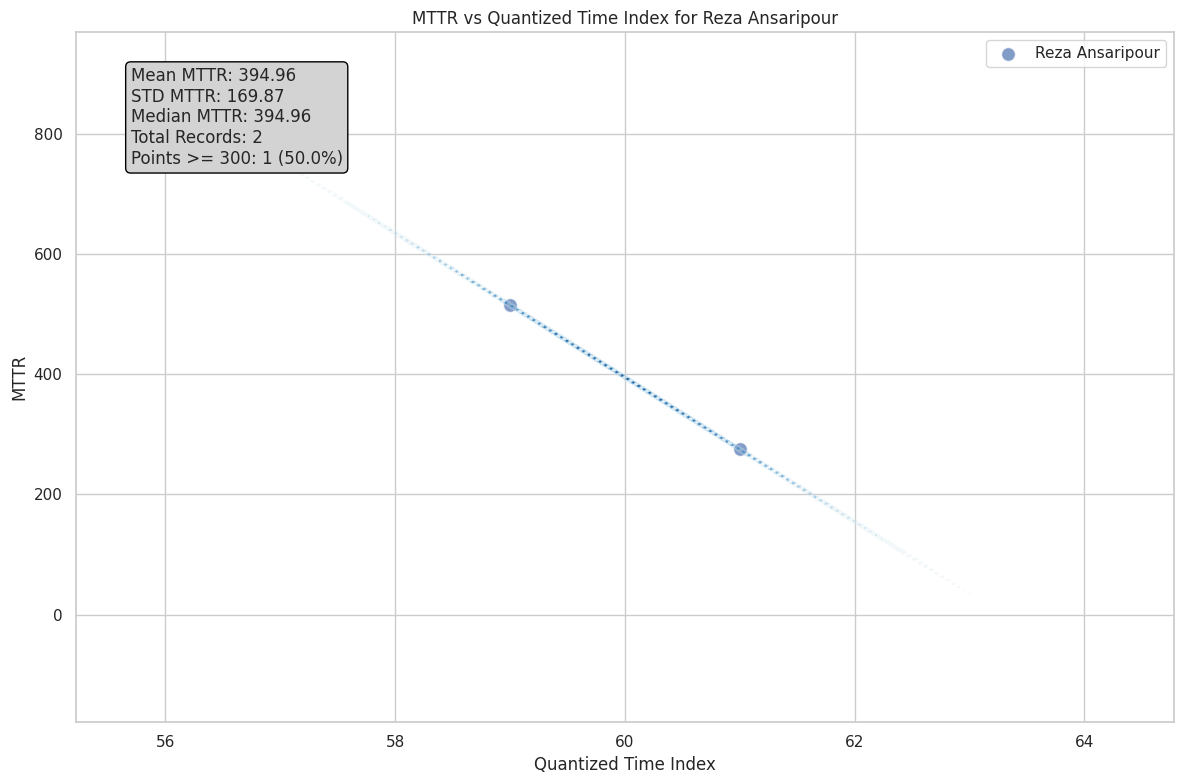

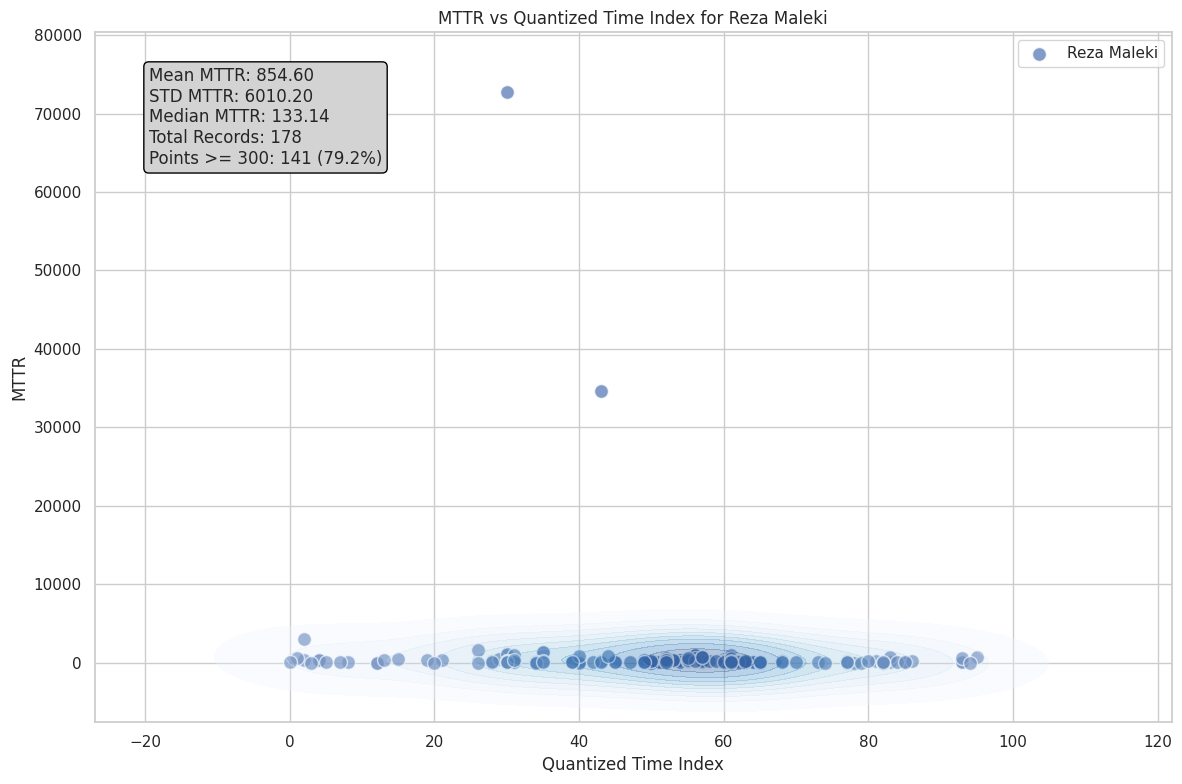

<ipython-input-27-7be23ce7ce20>:27: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=group['Quantized Time Index'], y=group['MTTR'], fill=True, cmap='Blues', alpha=0.3)


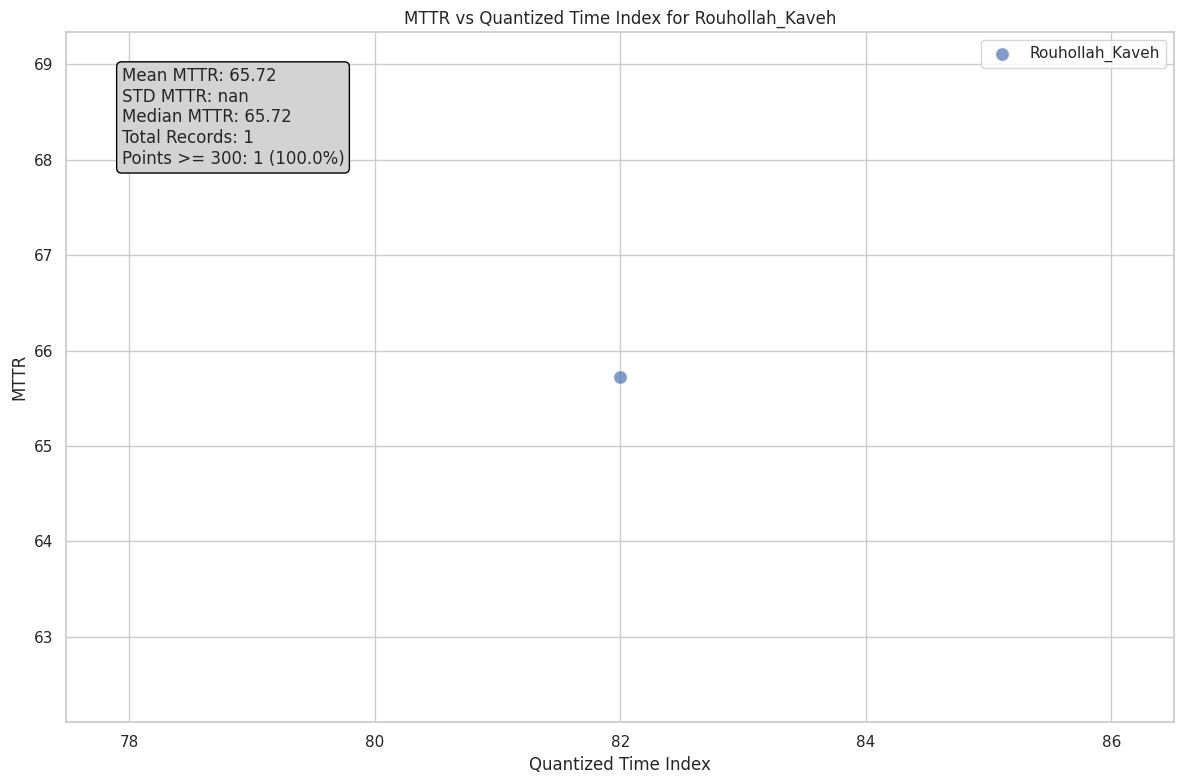

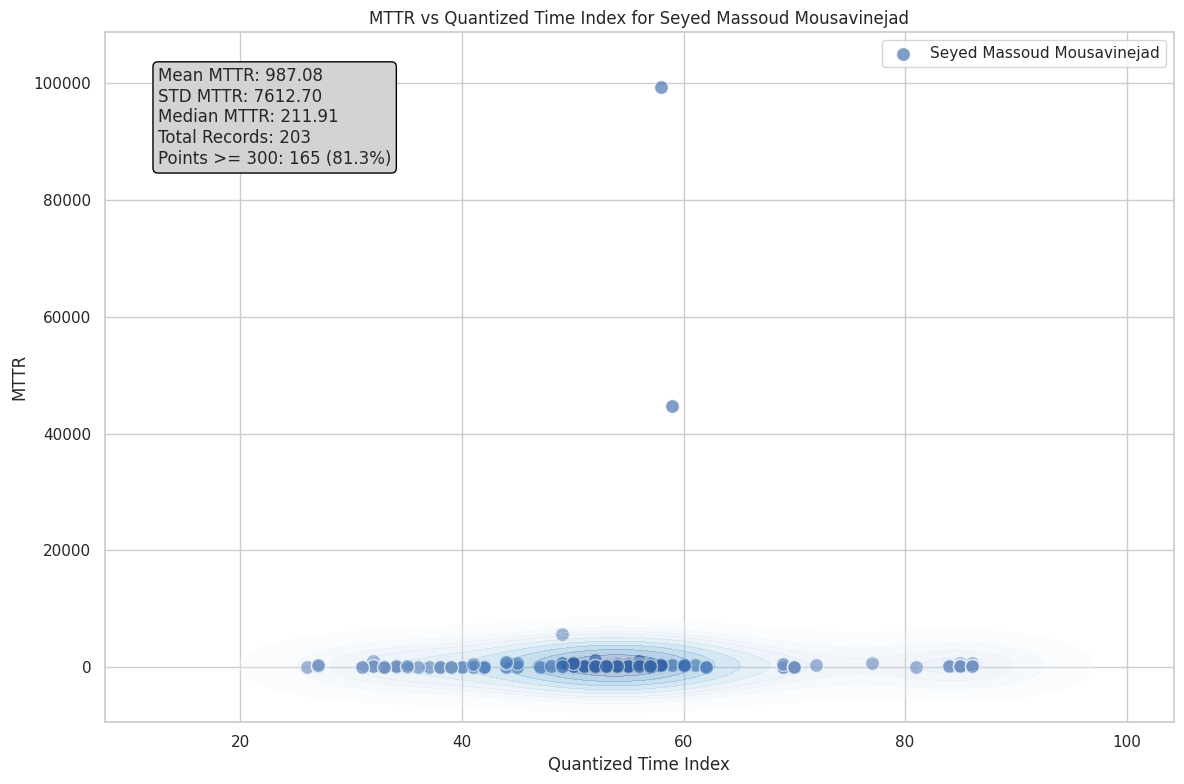

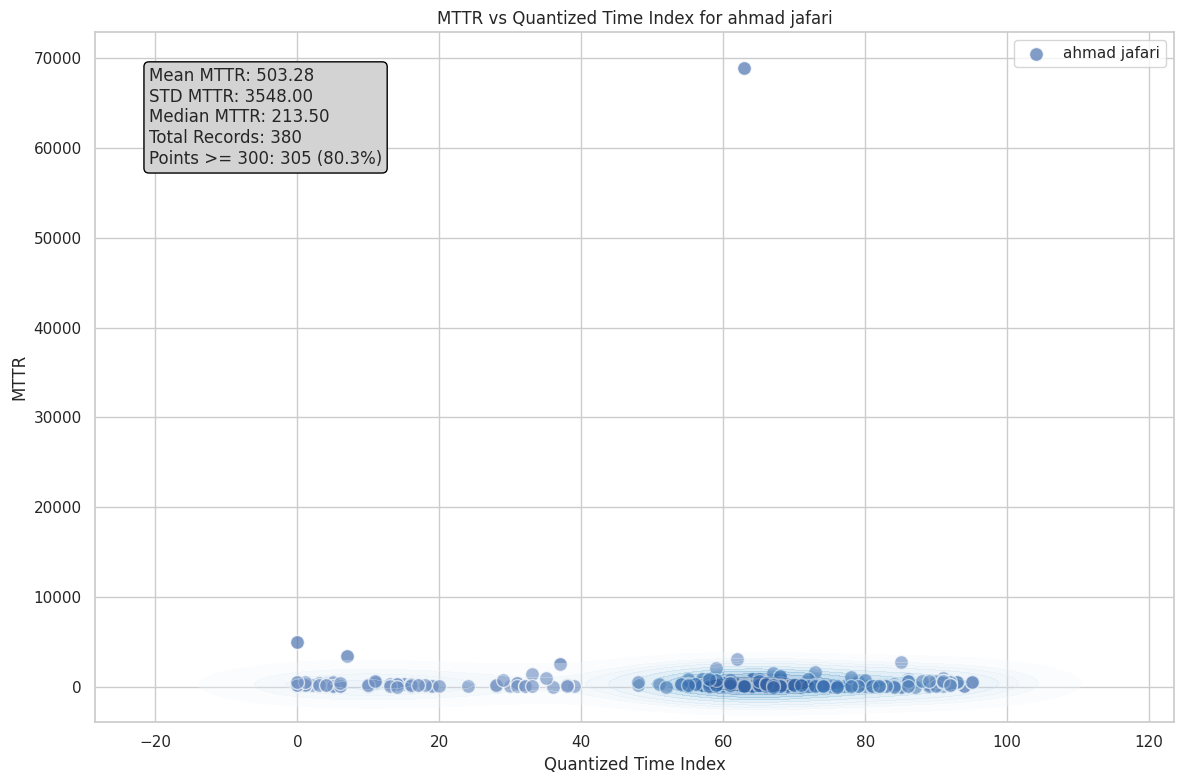

<ipython-input-27-7be23ce7ce20>:27: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=group['Quantized Time Index'], y=group['MTTR'], fill=True, cmap='Blues', alpha=0.3)


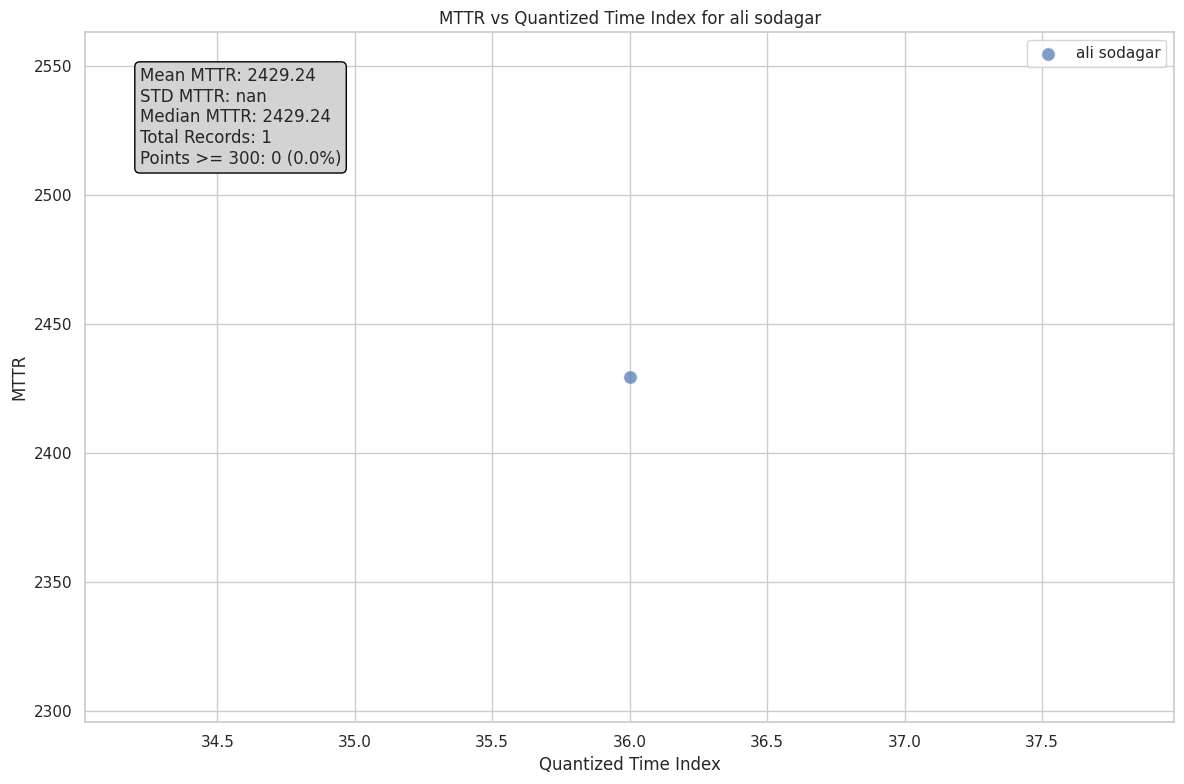

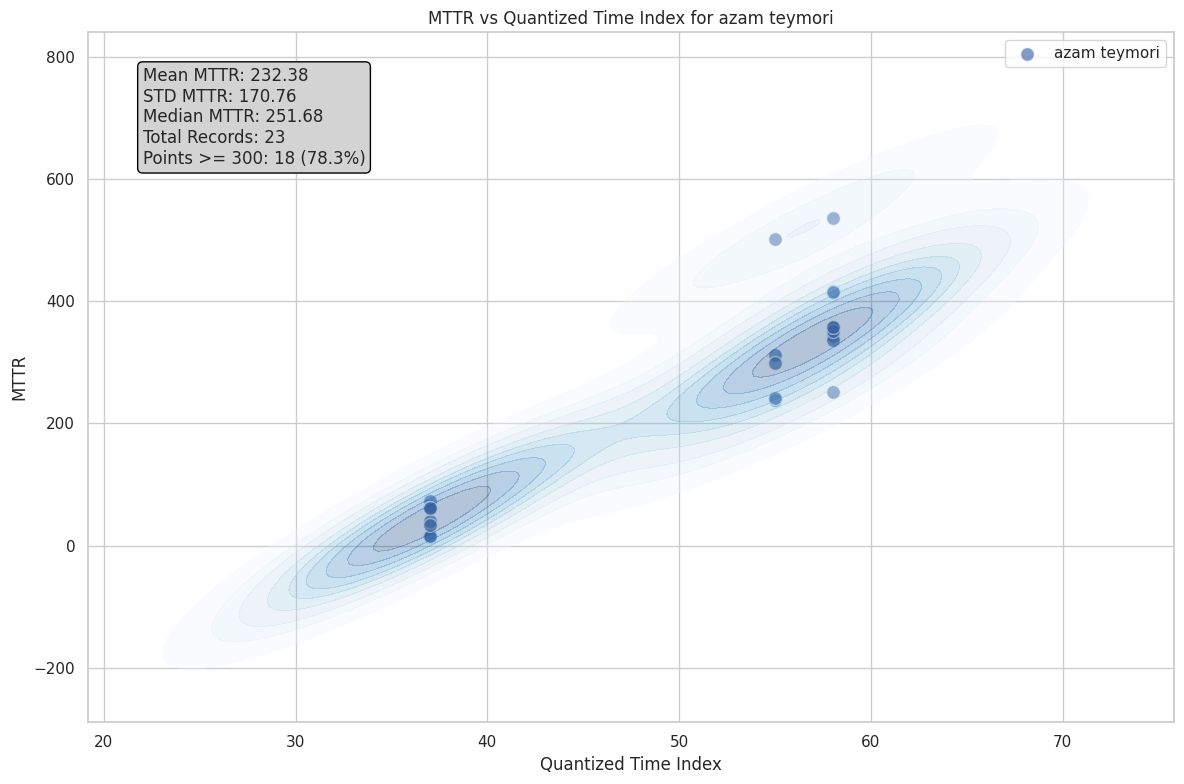

<ipython-input-27-7be23ce7ce20>:27: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=group['Quantized Time Index'], y=group['MTTR'], fill=True, cmap='Blues', alpha=0.3)


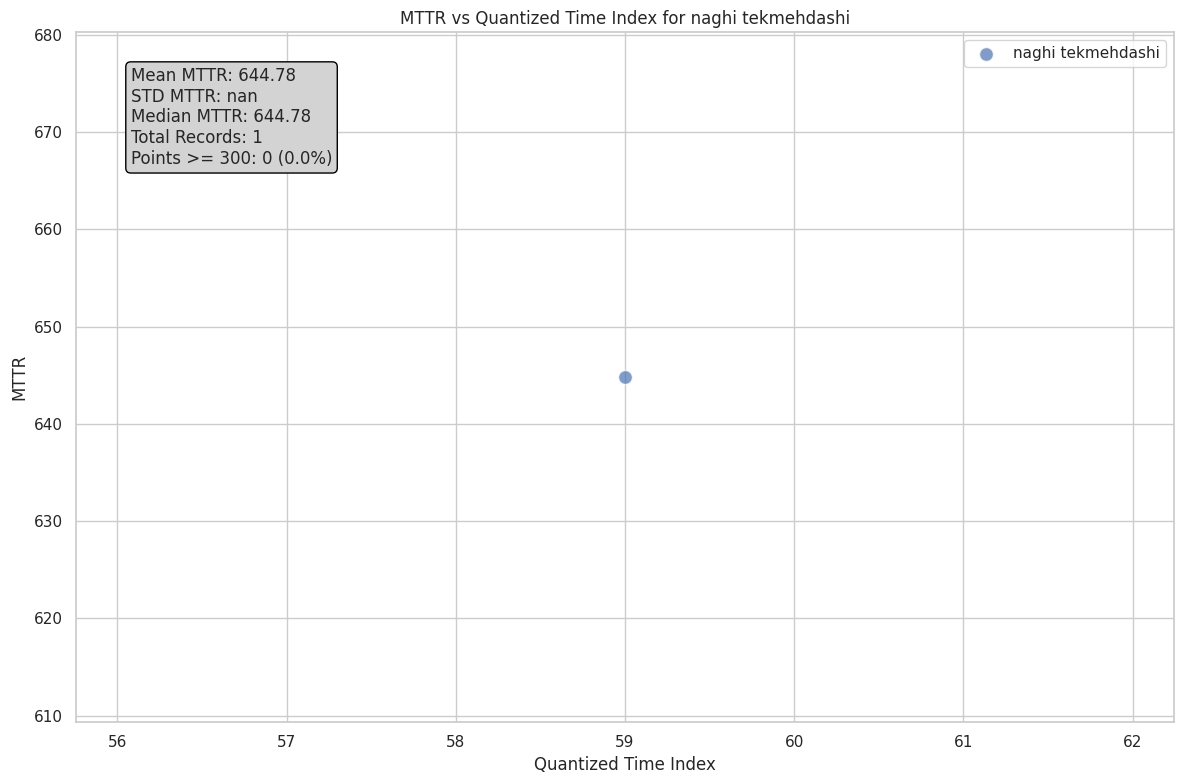

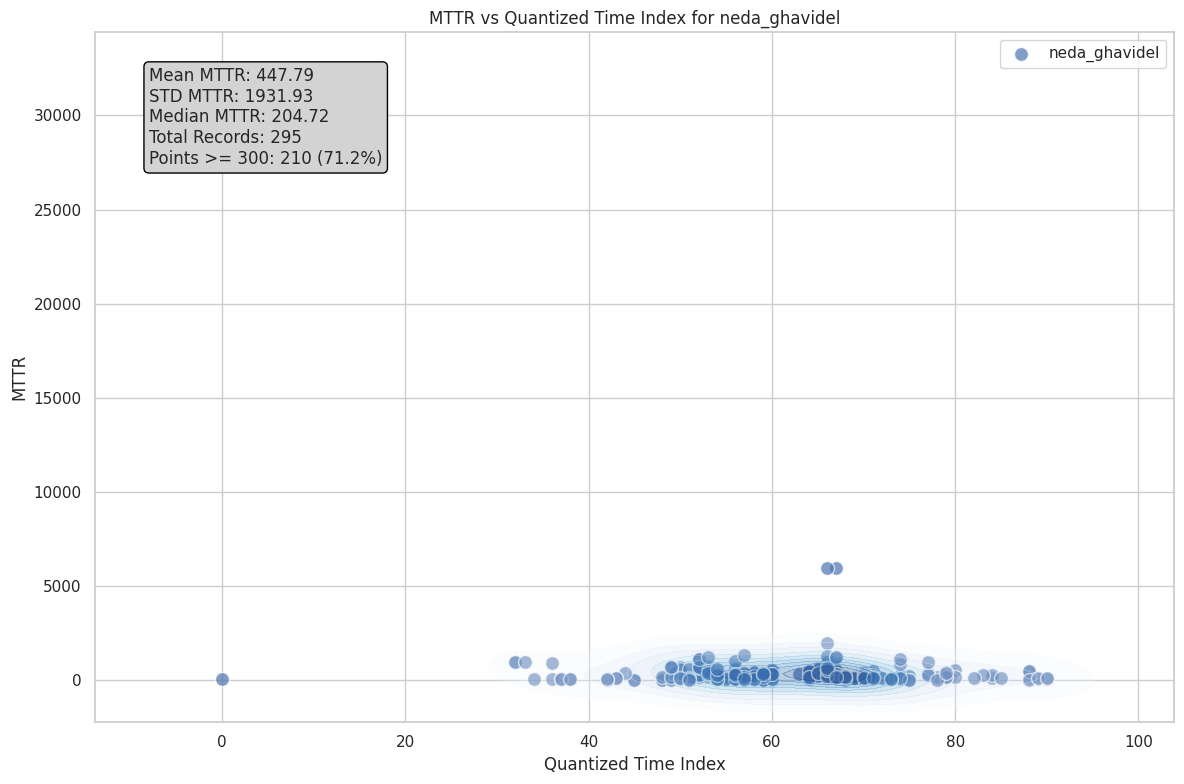

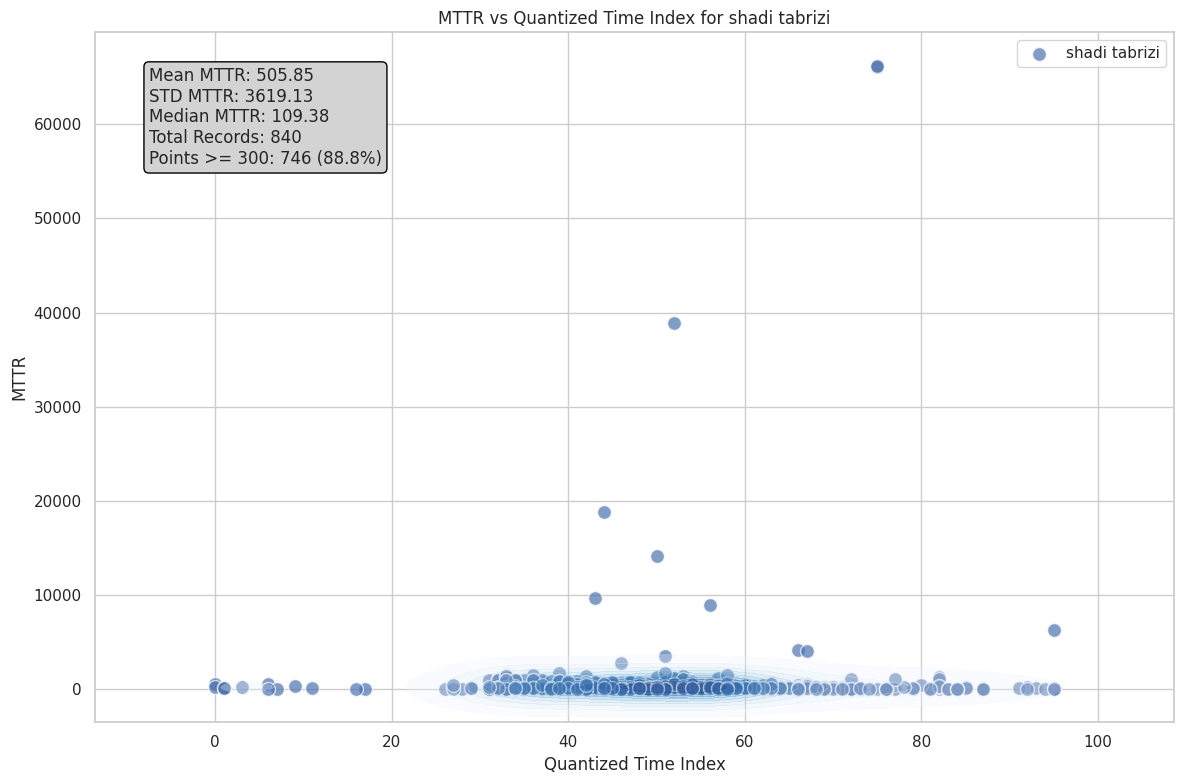

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DataFrame (assuming df is already defined)
# df = pd.read_excel('your_file.xlsx')  # Uncomment this line if you need to load the data

# Ensure that the necessary columns are present
required_columns = ['OPERATORNAMEPROVINCE', 'MTTR', 'Quantized Time Index', 'Points']
if not all(column in df.columns for column in required_columns):
    raise ValueError(f"Excel file must contain the following columns: {', '.join(required_columns)}")

# Set the style for seaborn
sns.set(style='whitegrid')

# Group data by OPERATORNAMEPROVINCE
grouped = df.groupby('OPERATORNAMEPROVINCE')

# Create a scatter plot for each OPERATORNAMEPROVINCE
for name, group in grouped:
    plt.figure(figsize=(12, 8))

    # Scatter plot
    plt.scatter(group['Quantized Time Index'], group['MTTR'], label=name, alpha=0.7, edgecolors='w', s=100)

    # KDE plot
    sns.kdeplot(x=group['Quantized Time Index'], y=group['MTTR'], fill=True, cmap='Blues', alpha=0.3)

    # Calculate statistics
    mean_mttr = group['MTTR'].mean()
    std_mttr = group['MTTR'].std()
    median_mttr = group['MTTR'].median()

    # Calculate number of records and percentage of records with Points >= 300
    total_records = len(group)
    records_with_points = (group['Points'] >= 300).sum()
    percent_with_points = (records_with_points / total_records) * 100 if total_records > 0 else 0

    # Display statistics on the plot
    stats_text = (f'Mean MTTR: {mean_mttr:.2f}\n'
                  f'STD MTTR: {std_mttr:.2f}\n'
                  f'Median MTTR: {median_mttr:.2f}\n'
                  f'Total Records: {total_records}\n'
                  f'Points >= 300: {records_with_points} ({percent_with_points:.1f}%)')

    plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=12,
             verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='lightgrey'))

    # Labels and title
    plt.xlabel('Quantized Time Index')
    plt.ylabel('MTTR')
    plt.title(f'MTTR vs Quantized Time Index for {name}')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.tight_layout()
    plt.show()

<ipython-input-28-32473b5f3ca9>:36: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=group['Quantized Time Index'], y=group['MTTR'], fill=True, cmap='Blues', alpha=0.3, ax=ax)
<ipython-input-28-32473b5f3ca9>:36: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=group['Quantized Time Index'], y=group['MTTR'], fill=True, cmap='Blues', alpha=0.3, ax=ax)
<ipython-input-28-32473b5f3ca9>:36: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=group['Quantized Time Index'], y=group['MTTR'], fill=True, cmap='Blues', alpha=0.3, ax=ax)
<ipython-input-28-32473b5f3ca9>:36: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=group['Quantized Ti

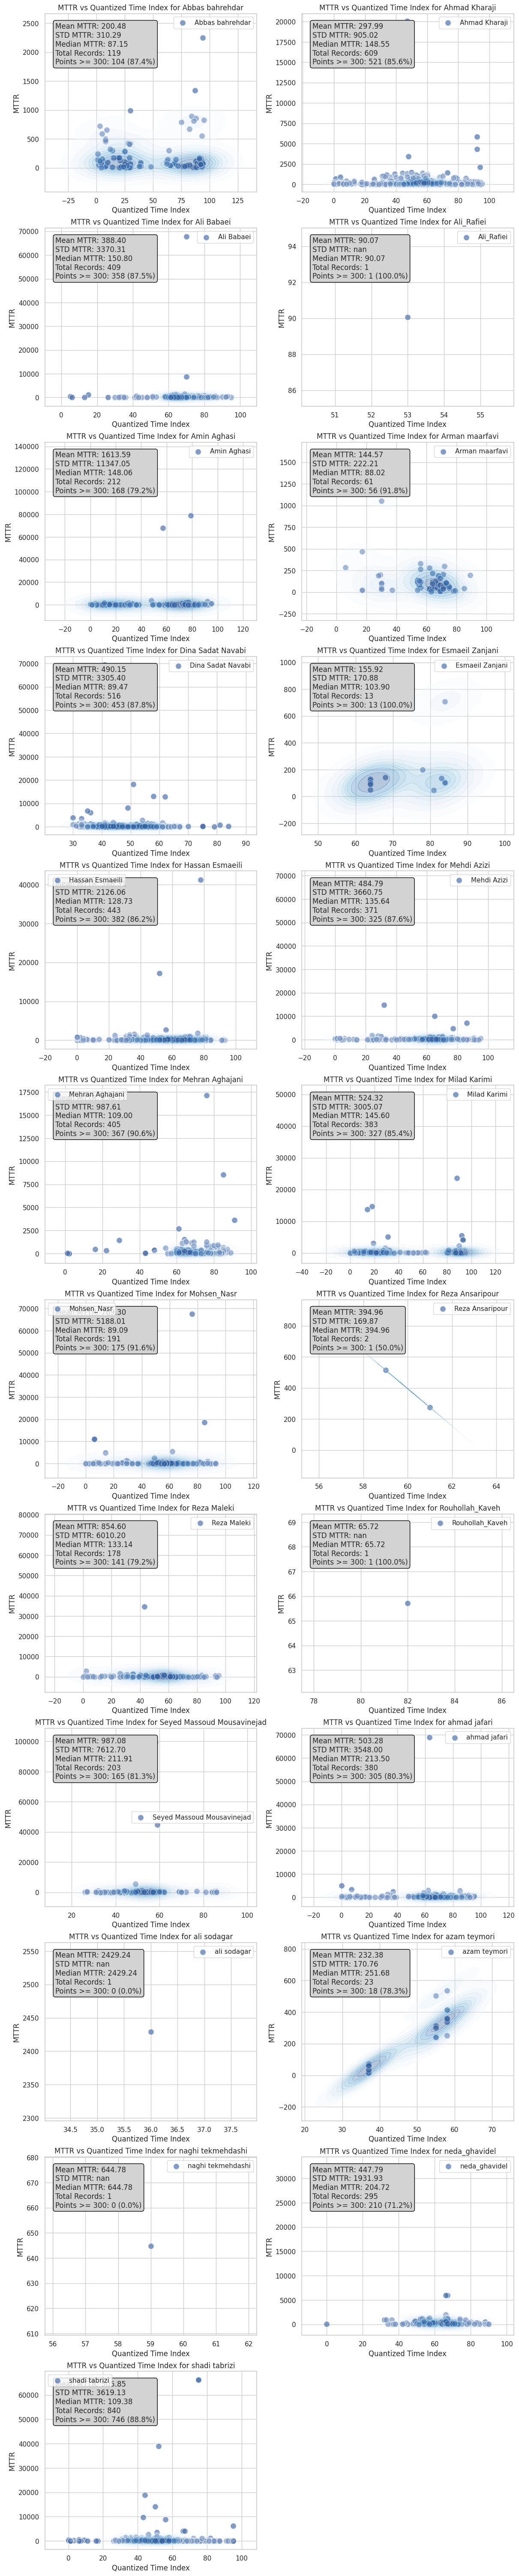

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DataFrame (assuming df is already defined)
# df = pd.read_excel('your_file.xlsx')  # Uncomment this line if you need to load the data

# Ensure that the necessary columns are present
required_columns = ['OPERATORNAMEPROVINCE', 'MTTR', 'Quantized Time Index', 'Points']
if not all(column in df.columns for column in required_columns):
    raise ValueError(f"Excel file must contain the following columns: {', '.join(required_columns)}")

# Set the style for seaborn
sns.set(style='whitegrid')

# Group data by OPERATORNAMEPROVINCE
grouped = df.groupby('OPERATORNAMEPROVINCE')

# Determine the number of operators for subplot layout
num_operators = len(grouped)
cols = 2  # Number of columns in the subplot grid
rows = (num_operators + cols - 1) // cols  # Calculate number of rows needed

# Create a figure and axes for subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create a scatter plot for each OPERATORNAMEPROVINCE
for ax, (name, group) in zip(axes, grouped):
    # Scatter plot
    ax.scatter(group['Quantized Time Index'], group['MTTR'], label=name, alpha=0.7, edgecolors='w', s=100)

    # KDE plot
    sns.kdeplot(x=group['Quantized Time Index'], y=group['MTTR'], fill=True, cmap='Blues', alpha=0.3, ax=ax)

    # Calculate statistics
    mean_mttr = group['MTTR'].mean()
    std_mttr = group['MTTR'].std()
    median_mttr = group['MTTR'].median()

    # Calculate number of records and percentage of records with Points >= 300
    total_records = len(group)
    records_with_points = (group['Points'] >= 300).sum()
    percent_with_points = (records_with_points / total_records) * 100 if total_records > 0 else 0

    # Display statistics on the plot
    stats_text = (f'Mean MTTR: {mean_mttr:.2f}\n'
                  f'STD MTTR: {std_mttr:.2f}\n'
                  f'Median MTTR: {median_mttr:.2f}\n'
                  f'Total Records: {total_records}\n'
                  f'Points >= 300: {records_with_points} ({percent_with_points:.1f}%)')

    ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='lightgrey'))

    # Labels and title
    ax.set_xlabel('Quantized Time Index')
    ax.set_ylabel('MTTR')
    ax.set_title(f'MTTR vs Quantized Time Index for {name}')
    ax.legend()
    ax.grid(True)

# Hide any unused subplots (if num_operators is not a perfect multiple of cols)
for i in range(num_operators, len(axes)):
    fig.delaxes(axes[i])

# Show the plot
plt.show()

## MTTR vs Quantized Time Index

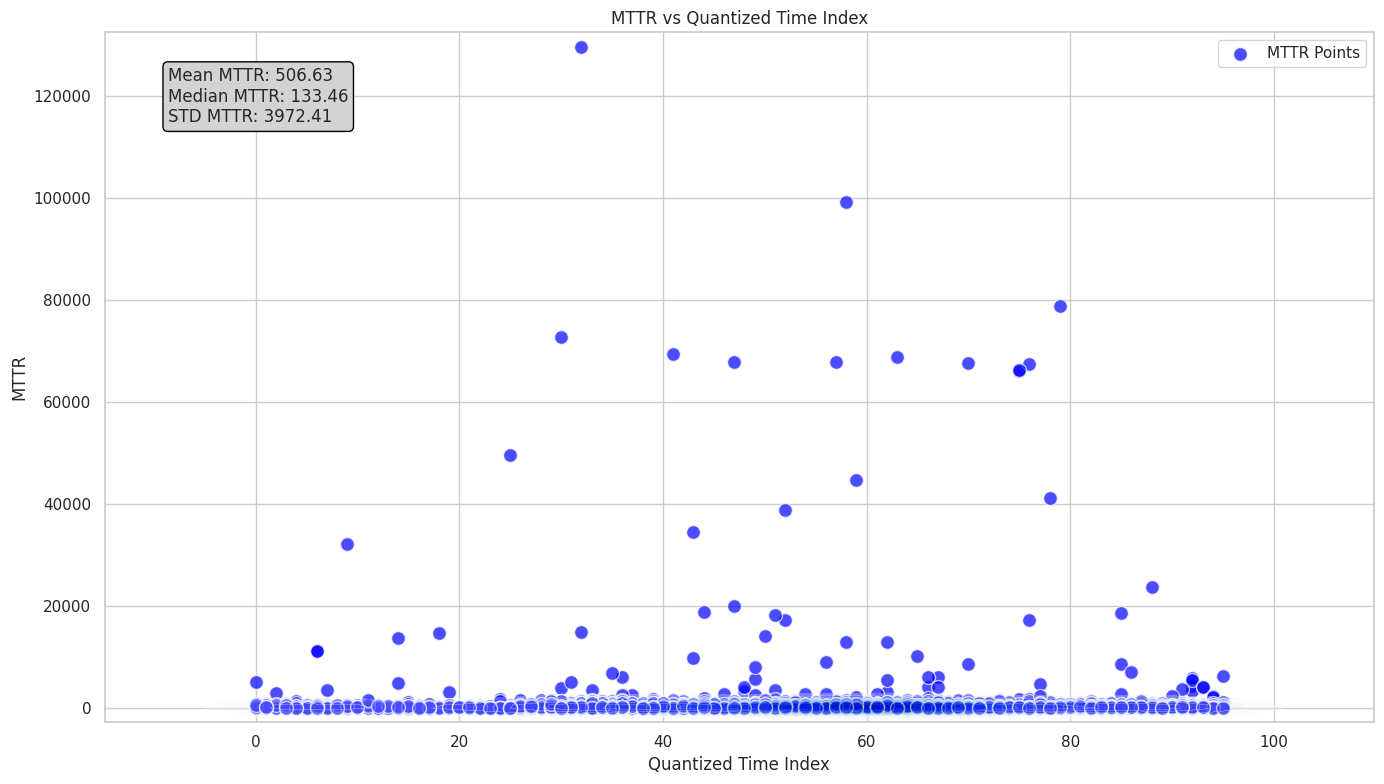

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DataFrame (assuming df is already defined)
# df = pd.read_excel('your_file.xlsx')  # Uncomment this line if you need to load the data

# Ensure that the necessary columns are present
required_columns = ['MTTR', 'Quantized Time Index']
if not all(column in df.columns for column in required_columns):
    raise ValueError(f"Excel file must contain the following columns: {', '.join(required_columns)}")

# Set the style for seaborn
sns.set(style='whitegrid')

# Create a scatter plot for MTTR vs Quantized Time Index
plt.figure(figsize=(14, 8))

# Scatter plot
scatter = plt.scatter(df['Quantized Time Index'], df['MTTR'],
                      alpha=0.7, edgecolors='w', s=100, c='blue', label='MTTR Points')

# KDE plot
sns.kdeplot(x=df['Quantized Time Index'], y=df['MTTR'], fill=True, cmap='Blues', alpha=0.3)

# Calculate and display statistics
mean_mttr = df['MTTR'].mean()
median_mttr = df['MTTR'].median()
std_mttr = df['MTTR'].std()

stats_text = (f'Mean MTTR: {mean_mttr:.2f}\n'
              f'Median MTTR: {median_mttr:.2f}\n'
              f'STD MTTR: {std_mttr:.2f}')
plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='lightgrey'))

# Labels and title
plt.xlabel('Quantized Time Index')
plt.ylabel('MTTR')
plt.title('MTTR vs Quantized Time Index')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

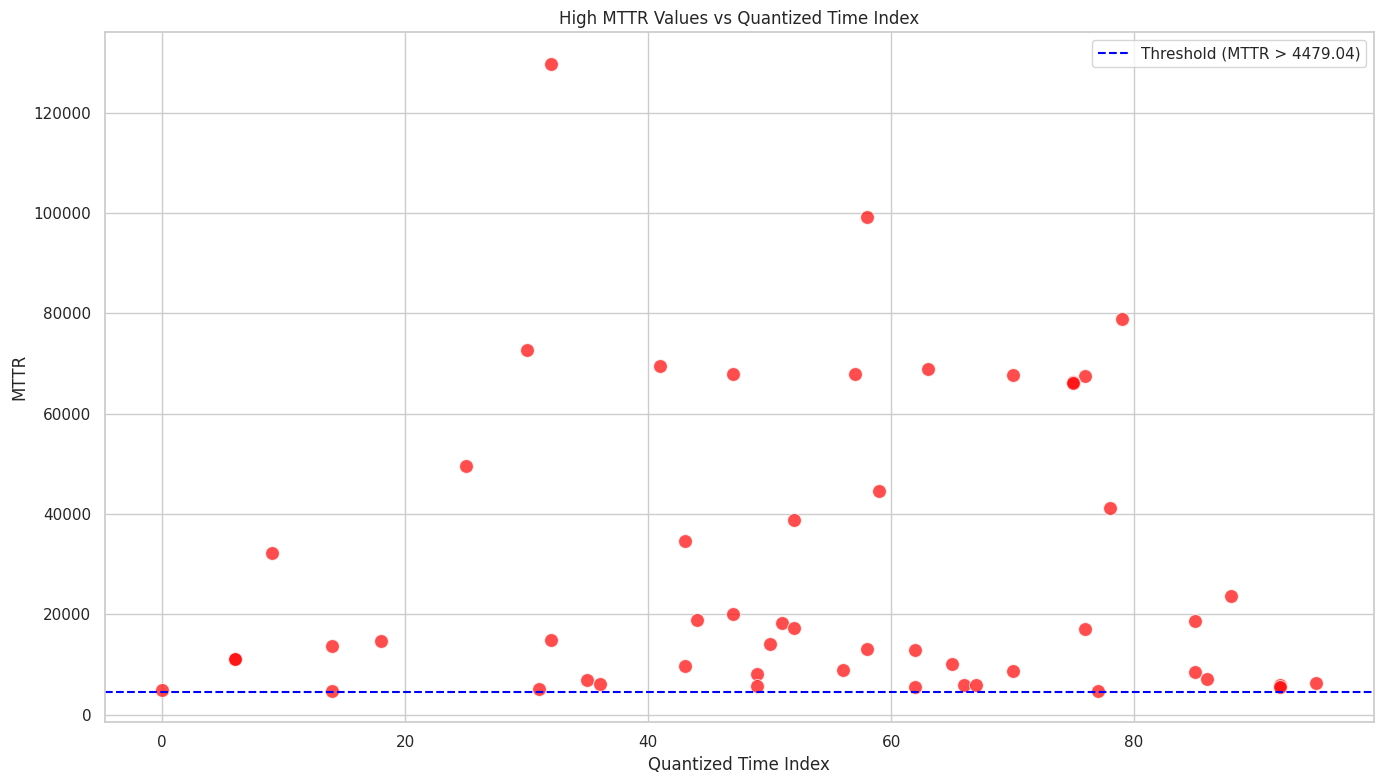

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DataFrame (assuming df is already defined)
# df = pd.read_excel('your_file.xlsx')  # Uncomment this line if you need to load the data

# Ensure that the necessary columns are present
required_columns = ['MTTR', 'Quantized Time Index', 'SUBCAUSE', 'CODESITE', 'OPERATORNAMEPROVINCE']
if not all(column in df.columns for column in required_columns):
    raise ValueError(f"Excel file must contain the following columns: {', '.join(required_columns)}")

# Set the style for seaborn
sns.set(style='whitegrid')

# Calculate statistics to define "large" MTTR
mean_mttr = df['MTTR'].mean()
std_mttr = df['MTTR'].std()
threshold = mean_mttr + std_mttr  # Define large MTTR as mean + 1 std deviation

# Filter data for high MTTR values
high_mttr_df = df[df['MTTR'] > threshold]

# Sort the filtered DataFrame by MTTR in descending order
high_mttr_df = high_mttr_df.sort_values(by='MTTR', ascending=False)

# Plotting high MTTR values
plt.figure(figsize=(14, 8))
sns.scatterplot(data=high_mttr_df, x='Quantized Time Index', y='MTTR', color='red', s=100, alpha=0.7, edgecolor='w')

# Add a horizontal line for the threshold
plt.axhline(y=threshold, color='blue', linestyle='--', label=f'Threshold (MTTR > {threshold:.2f})')

# Labels and title
plt.xlabel('Quantized Time Index')
plt.ylabel('MTTR')
plt.title('High MTTR Values vs Quantized Time Index')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

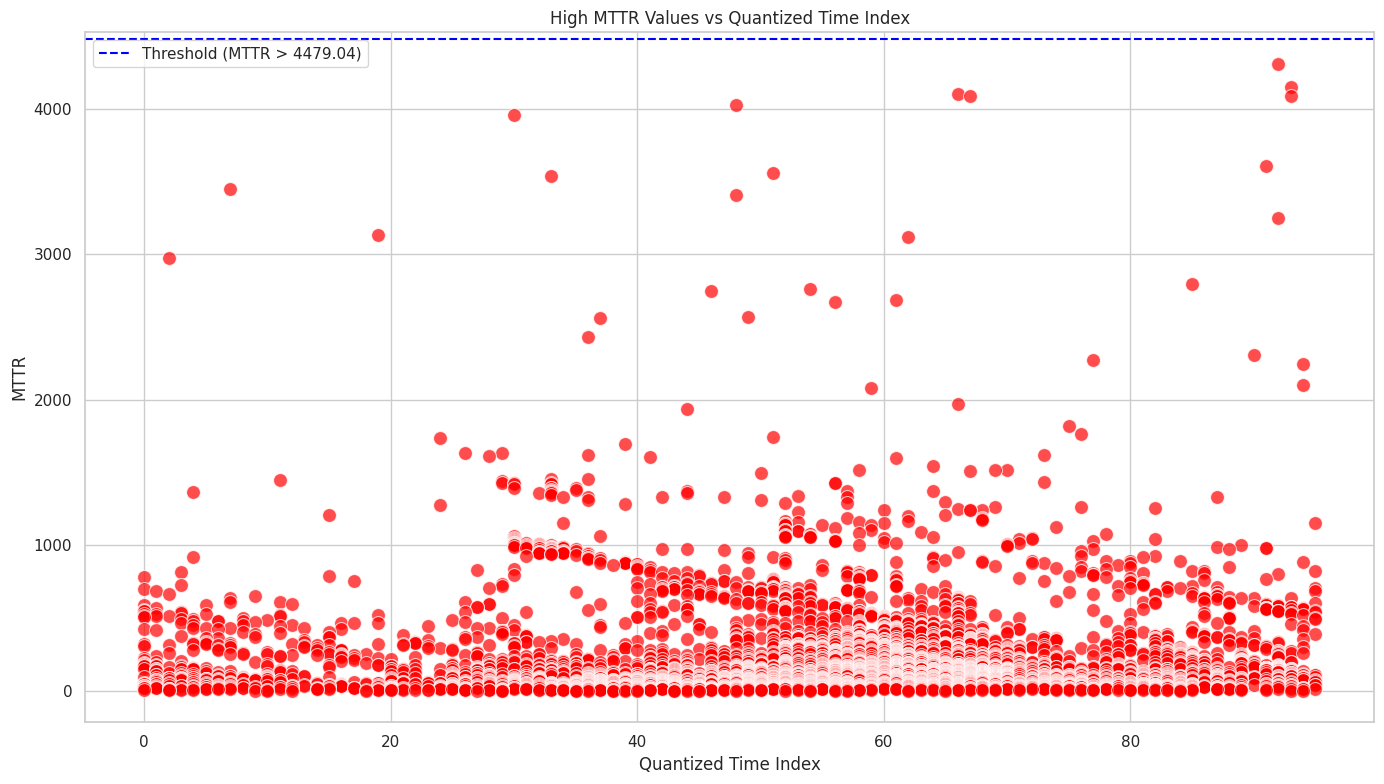

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DataFrame (assuming df is already defined)
df = pd.read_excel('Final_Tickets.xlsx')  # Uncomment this line if you need to load the data

# Ensure that the necessary columns are present
required_columns = ['MTTR', 'Quantized Time Index', 'SUBCAUSE', 'CODESITE', 'OPERATORNAMEPROVINCE']
if not all(column in df.columns for column in required_columns):
    raise ValueError(f"Excel file must contain the following columns: {', '.join(required_columns)}")

# Set the style for seaborn
sns.set(style='whitegrid')

# Calculate statistics to define "large" MTTR
mean_mttr = df['MTTR'].mean()
std_mttr = df['MTTR'].std()
threshold = mean_mttr + std_mttr  # Define large MTTR as mean + 1 std deviation

# Filter data for high MTTR values
high_mttr_df = df[df['MTTR'] < threshold]

# Sort the filtered DataFrame by MTTR in descending order
high_mttr_df = high_mttr_df.sort_values(by='MTTR', ascending=False)

# Plotting high MTTR values
plt.figure(figsize=(14, 8))
sns.scatterplot(data=high_mttr_df, x='Quantized Time Index', y='MTTR', color='red', s=100, alpha=0.7, edgecolor='w')

# Add a horizontal line for the threshold
plt.axhline(y=threshold, color='blue', linestyle='--', label=f'Threshold (MTTR > {threshold:.2f})')

# Labels and title
plt.xlabel('Quantized Time Index')
plt.ylabel('MTTR')
plt.title('High MTTR Values vs Quantized Time Index')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Display the filtered and sorted data for reference, showing only specific columns
filtered_columns = ['MTTR', 'CODESITE', 'OPERATORNAMEPROVINCE']
print(high_mttr_df[filtered_columns])

           MTTR  CODESITE        OPERATORNAMEPROVINCE
4069  129745.01  ES1G1531                 Amin Aghasi
1211   99279.03    ES0747  Seyed Massoud Mousavinejad
4031   78786.52  ES1G1561                 Amin Aghasi
2819   72762.31    ES0220                 Reza Maleki
4749   69462.13  ES1G1489           Dina Sadat Navabi
1182   68911.62    ES1415                ahmad jafari
4751   67931.77    ES1489                 Mehdi Azizi
118    67885.18    ES1637                 Amin Aghasi
5159   67733.59    ES1827                  Ali Babaei
5017   67531.28    ES1484                 Mohsen_Nasr
5158   66231.73    ES1827               shadi tabrizi
5014   66119.95    ES1484               shadi tabrizi
4748   49531.94    ES1489                Milad Karimi
2394   44648.72  ES1G1646  Seyed Massoud Mousavinejad
4073   41215.38    ES1531             Hassan Esmaeili
1196   38888.93    ES0747               shadi tabrizi
5363   34576.10    ES1666                 Reza Maleki
3645   32166.73    ES0469   

# **PART 2 [Network Graph]**

In [ ]:
pip install pyvis

## upload data

In [ ]:
# Upload the Excel file
uploaded = files.upload()

Saving تیکت ها.xlsx to تیکت ها.xlsx


## viewing all nodes

In [ ]:
import pandas as pd
import networkx as nx
from pyvis.network import Network

# Step 1: Read the Excel file
file_path = 'تیکت ها.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Step 2: Extract relevant columns
error_sites = df.iloc[:, 10]  # Column 10 (index 9)
dependent_sites = df.iloc[:, 22]  # Column 22 (index 21)

# Step 3: Create a graph
G = nx.DiGraph()

# Step 4: Add nodes and edges to the graph, checking for null siteids
for error_site, dependents in zip(error_sites, dependent_sites):
    if pd.notna(error_site) and error_site != "Null":  # Check if error site is not NaN or "null"
        G.add_node(error_site)
        if pd.notna(dependents):
            for dependent_site in dependents.split(' '):  # Assuming dependencies are comma-separated
                dependent_site = dependent_site.strip()  # Remove any leading/trailing whitespace
                if dependent_site and dependent_site != "Null":  # Check if dependent site is not "null"
                    G.add_node(dependent_site)
                    G.add_edge(error_site, dependent_site)

# Step 5: Visualize the graph using Pyvis
net = Network(height='750px', width='100%', notebook=True, cdn_resources='in_line')

# Add nodes and edges to the Pyvis network
for node in G.nodes:
    net.add_node(node, label=node)

for edge in G.edges:
    net.add_edge(edge[0], edge[1])

# Display the graph
net.show('network_graph.html')


## The Graph of only nodes which are connected at least to another node The nodes which Error happen in them are shown in red

In [ ]:
import pandas as pd
import networkx as nx
from pyvis.network import Network

# Step 1: Read the Excel file
file_path = 'تیکت ها.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Step 2: Extract relevant columns
error_sites = df.iloc[:, 10]  # Column 10 (index 9)
dependent_sites = df.iloc[:, 22]  # Column 22 (index 21)

# Step 3: Create a graph
G = nx.DiGraph()

# Track error sites for highlighting
error_site_set = set()

# Step 4: Add nodes and edges to the graph, checking for null siteids
for error_site, dependents in zip(error_sites, dependent_sites):
    if pd.notna(error_site) and error_site != "Null":  # Check if error site is not NaN or "null"
        G.add_node(error_site)
        error_site_set.add(error_site)  # Add to the set of error sites
        if pd.notna(dependents):
            for dependent_site in dependents.split(' '):  # Assuming dependencies are comma-separated
                dependent_site = dependent_site.strip()  # Remove any leading/trailing whitespace
                if dependent_site and dependent_site != "Null":  # Check if dependent site is not "null"
                    G.add_node(dependent_site)
                    G.add_edge(error_site, dependent_site)

# Step 5: Remove self-loops
G.remove_edges_from(nx.selfloop_edges(G))

# Step 6: Remove isolated nodes
isolated_nodes = list(nx.isolates(G))
G.remove_nodes_from(isolated_nodes)

# Step 7: Visualize the graph using Pyvis
net = Network(height='750px', width='100%', notebook=False, cdn_resources='remote', directed=True)

# Add nodes and edges to the Pyvis network
for node in G.nodes:
    if node in error_site_set:
        net.add_node(node, label=node, color='red', shape='dot', size=20)  # Highlight error sites
    else:
        net.add_node(node, label=node, color='blue', shape='dot', size=15)  # Regular nodes

for edge in G.edges:
    net.add_edge(edge[0], edge[1], arrows='to')  # Add arrows to indicate direction

# Save the graph to an HTML file
html_file_path = 'network_graph_error_red.html'
net.save_graph(html_file_path)

print(f"Network graph saved to {html_file_path}")


## The Graph of Error sites and The sites which Error happen in them because of the first Error

In [ ]:
import pandas as pd
import networkx as nx
from pyvis.network import Network
import re

# Step 1: Read the Excel file
file_path = 'تیکت ها.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Step 2: Extract relevant columns
error_sites = df.iloc[:, 10]  # Column 10 (index 9)
dependent_sites = df.iloc[:, 16]  # Column 16 (index 15)

# Step 3: Create a graph
G = nx.DiGraph()

# Track error sites for highlighting
error_site_set = set()

# Define a regex pattern to split by space, comma, tab, or newline
pattern = re.compile(r'[,\s\t\n]+')

# Step 4: Add nodes and edges to the graph, checking for null siteids
for error_site, dependents in zip(error_sites, dependent_sites):
    if pd.notna(error_site) and error_site != "Null":  # Check if error site is not NaN or "null"
        G.add_node(error_site)
        error_site_set.add(error_site)  # Add to the set of error sites
        if pd.notna(dependents):
            for dependent_site in pattern.split(dependents):  # Split using regex pattern
                dependent_site = dependent_site.strip()  # Remove any leading/trailing whitespace
                if dependent_site and dependent_site != "Null":  # Check if dependent site is not "null"
                    G.add_node(dependent_site)
                    G.add_edge(error_site, dependent_site)

# Step 5: Remove self-loops
G.remove_edges_from(nx.selfloop_edges(G))

# Step 6: Remove isolated nodes
isolated_nodes = list(nx.isolates(G))
G.remove_nodes_from(isolated_nodes)

# Step 7: Visualize the graph using Pyvis
net = Network(height='750px', width='100%', notebook=False, cdn_resources='remote', directed=True)

# Add nodes and edges to the Pyvis network
for node in G.nodes:
    if node in error_site_set:
        net.add_node(node, label=node, color='red', shape='dot', size=20)  # Highlight error sites
    else:
        net.add_node(node, label=node, color='blue', shape='dot', size=15)  # Regular nodes

for edge in G.edges:
    net.add_edge(edge[0], edge[1], arrows='to')  # Add arrows to indicate direction

# Save the graph to an HTML file
html_file_path = 'Error_graph.html'
net.save_graph(html_file_path)

print(f"Network graph saved to {html_file_path}")


Network graph saved to network_graph_error_red.html


# **PART 3 [Data Cleaning]**

## Points

In [ ]:
import pandas as pd

def calculate_points_mtta(mtta):
    if mtta < 15:
        return 100
    elif 15 <= mtta <= 30:
        return 90
    elif 30 < mtta < 60:
        return 60
    elif 60 < mtta < 90:
        return 0
    else:
        return -20

def calculate_points_mtbrc(mtbrc):
    if mtbrc < 60:
        return 100
    elif 60 <= mtbrc <= 120:
        return 80
    elif 120 < mtbrc < 180:
        return 50
    else:
        return 0

def calculate_points_mttr(mttr, level, affected):
    if affected == 'NO':
        if mttr < 4320:
            return 100
        elif 4320 < mttr <= 5760:
            return 80
        elif 5760 < mttr <= 7200:
            return 50
        elif 7200 < mttr <= 8640:
            return 20
        else:
            return 0
    else:#should add the levels of the mttr
        if level == 'LEVEL1':
            if mttr < 180:
                return 100
            elif 180 < mttr <= 240:
                return 60
            elif 240 < mttr <= 300:
                return 50
            elif 300 < mttr <= 600:
                return 20
            else:
                return 0

        elif level == 'LEVEL2':
            if mttr < 240:
                return 100
            elif 240 < mttr <= 300:
                return 70
            elif 300 < mttr <= 360:
                return 60
            elif 360 < mttr <= 720:
                return 30
            else:
                return 0

        elif level == 'LEVEL3':
            if mttr < 240:
                return 100
            elif 240 < mttr <= 300:
                return 80
            elif 300 < mttr <= 360:
                return 70
            elif 360 < mttr <= 720:
                return 40
            elif 720 < mttr <= 1440:
                return 10
            else:
                return 0

        elif level == 'LEVEL4':
            if mttr < 240:
                return 100
            elif 240 < mttr <= 300:
                return 90
            elif 300 < mttr <= 360:
                return 80
            elif 360 < mttr <= 720:
                return 50
            elif 720 < mttr <= 1440:
                return 20
            else:
                return 0


# Load the Excel file
file_path = 'Tickets_quantized_96.xlsx'
df = pd.read_excel(file_path)

# Print the columns to check for the correct MTTA column name
print("Columns in the dataframe:", df.columns)

# Assuming the actual column name is 'MTTA' or similar, adjust as necessary
mtta_column_name = 'MTTA'  # replace with the correct column name if it's different

mttr_column_name = 'MTTR'

mttr_level_column_name = 'FAULTLEVEL'

affective_column_name = 'Affected'

mtrbtc_column_name = 'MTRBTC'



# Add the Points column by applying the calculate_points function to the MTTA column
df['Points'] = df.apply(lambda row: calculate_points_mttr(row[mttr_column_name], row[mttr_level_column_name], row[affective_column_name]), axis=1) + df[mtta_column_name].apply(calculate_points_mtta) + df[mtrbtc_column_name].apply(calculate_points_mtbrc)
# Save the updated DataFrame back to an Excel file
output_file_path = 'updated_Tickets (10).xlsx'
df.to_excel(output_file_path, index=False)

print(f"Updated file saved as {output_file_path}")

## Elevation

In [ ]:
def get_elevation(lat, lon):
    url = f"https://api.open-elevation.com/api/v1/lookup?locations={lat},{lon}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return data['results'][0]['elevation']
    else:
        return None

In [ ]:
def add_elevation_to_excel(input_file, output_file, N):
    # Read the Excel file
    df = pd.read_excel(input_file)

    # Check if 'codesite', 'lat', and 'long' columns exist
    if 'CODESITE' not in df.columns or 'lat' not in df.columns or 'long' not in df.columns:
        print("Error: 'CODESITE', 'lat', and 'long' columns must exist in the input file.")
        return

    # Create a dictionary to store latitude and longitude for each codesite
    codesite_coords = {}
    for index, row in df.iterrows():
        codesite = row['CODESITE']
        lat = row['lat']
        longg = row['long']
        codesite_coords[codesite] = (lat, longg)

    # Check if 'elevation' column exists, create if not
    if 'elevation' not in df.columns:
        df['elevation'] = None

    flag = 0
    # Fetch elevations and update the DataFrame
    for index, row in df.iterrows():

        codesite = row['CODESITE']
        if pd.isna(row['elevation']) :  # Check if elevation is empty
            print('index= ',index)
            print('flag= ',flag)
            flag = flag + 1
            lat = df.loc[index, 'lat']
            longg = df.loc[index, 'long']
            elevation = get_elevation(lat, longg)
            print(df.loc[index, 'elevation'])
            df.at[index, 'elevation'] = elevation
            print(df.loc[index, 'elevation'])
            print(elevation)

        if flag == N :
          break

    # Save the updated DataFrame to a new Excel file
    df.to_excel(output_file, index=False)
    print(f"Updated file saved as {output_file}")

In [ ]:
input_file = 'Tickets.xlsx'  # Replace with your input Excel file name
output_file = 'updated_Tickets.xlsx'  # Replace with desired output file name
add_elevation_to_excel(input_file, output_filem, 2000)

## time quantization

In [ ]:
def quantize_to_parts(dt, N):
    """Quantize the given datetime object to the nearest N parts of a 24-hour day."""
    total_minutes = dt.hour * 60 + dt.minute + dt.second / 60
    # Calculate the length of each part in minutes
    part_length = 1440 / N  # 1440 minutes in a day
    quantized_index = round(total_minutes / part_length) % N
    quantized_minutes = quantized_index * part_length
    quantized_hour = int(quantized_minutes // 60)
    quantized_minute = int(quantized_minutes % 60)
    return quantized_index

In [ ]:
def process_excel_file(file_path, N):
    """Read an Excel file, quantize 'CREATETIME', and add 'Quantized Index' and 'Quantized Time' columns."""
    # Read the Excel file
    df = pd.read_excel(file_path)

    # Check if 'CREATETIME' column exists
    if 'CREATETIME' not in df.columns:
        raise ValueError("The 'CREATETIME' column is not present in the Excel file.")

    # Convert 'CREATETIME' to datetime objects and quantize
    df['Quantized Time Index'] = df['CREATETIME'].apply(
        lambda x: quantize_to_parts(pd.to_datetime(x), N)
    ).tolist()

    # Save the updated DataFrame back to Excel
    output_file_path = file_path.replace('.xlsx', f'_quantized_{N}.xlsx')
    df.to_excel(output_file_path, index=False)

    print(f"Quantized times added. Updated file saved as: {output_file_path}")

In [ ]:
N = 24 * 4
process_excel_file('Tickets.xlsx', N)

# **PART 4 [Decision tree model]**

## upload data

In [ ]:
# Upload the Excel file
uploaded = files.upload()

Saving Final_Tickets.xlsx to Final_Tickets.xlsx


In [ ]:
# Load your dataset
file_path = 'Final_Tickets.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

## Target: Points

In [ ]:
# Specify the target variable
target_column = 'Points'  # Replace with the name of your target column

# Select specific columns for features (X)
# Replace 'Column1', 'Column2', ... with the actual names of the columns you want
X = data[['CODESITE_encoded', 'lat', 'long', 'elevation', 'Quantized Time Index', 'MTBRTC_USER_encoded', 'Alarm_Type_encoded', 'FAULTLEVEL_encoded', 'Affected_encoded', 'PRODUCT_TYPE_encoded', 'orginator group_encoded', 'OPERATORNAMEPROVINCE_encoded', 'SUBCAUSE_encoded', 'ROOTCAUSE_encoded']]  # Specify the columns you want to include in X
y = data[target_column]  # Target variable

In [ ]:
# Initialize the Decision Tree Regressor
reg = DecisionTreeRegressor(random_state=42)

# Train the model on the entire dataset
reg.fit(X, y)

DecisionTreeRegressor(random_state=42)

                         Feature  Importance
12              SUBCAUSE_encoded    0.159204
4           Quantized Time Index    0.139621
5            MTBRTC_USER_encoded    0.107385
11  OPERATORNAMEPROVINCE_encoded    0.103207
8               Affected_encoded    0.101709
0               CODESITE_encoded    0.096896
2                           long    0.096333
1                            lat    0.078225
3                      elevation    0.058290
6             Alarm_Type_encoded    0.033424
13             ROOTCAUSE_encoded    0.022154
10       orginator group_encoded    0.003058
7             FAULTLEVEL_encoded    0.000495
9           PRODUCT_TYPE_encoded    0.000000


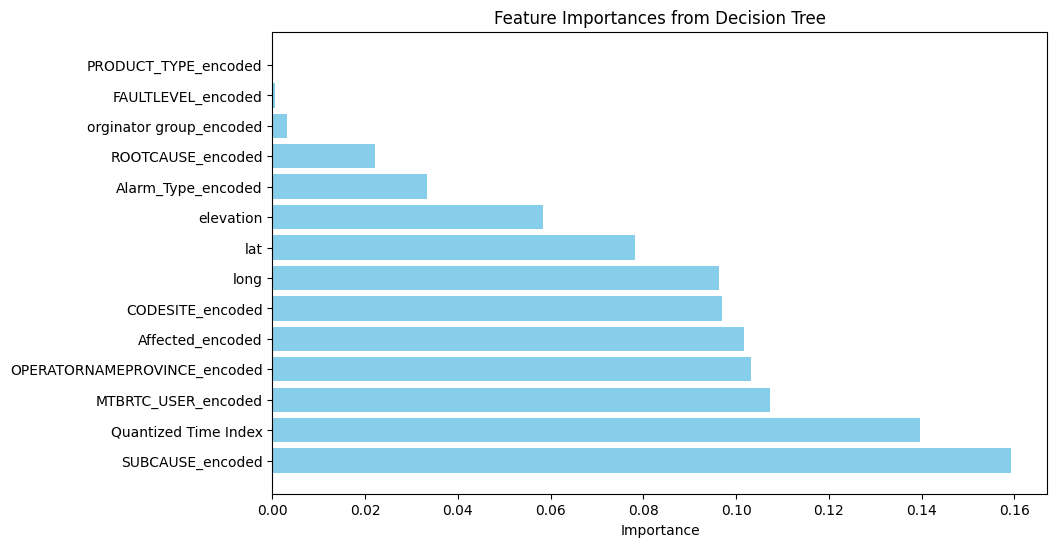

In [ ]:
# Get feature importances
feature_importances = reg.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Decision Tree')
plt.show()

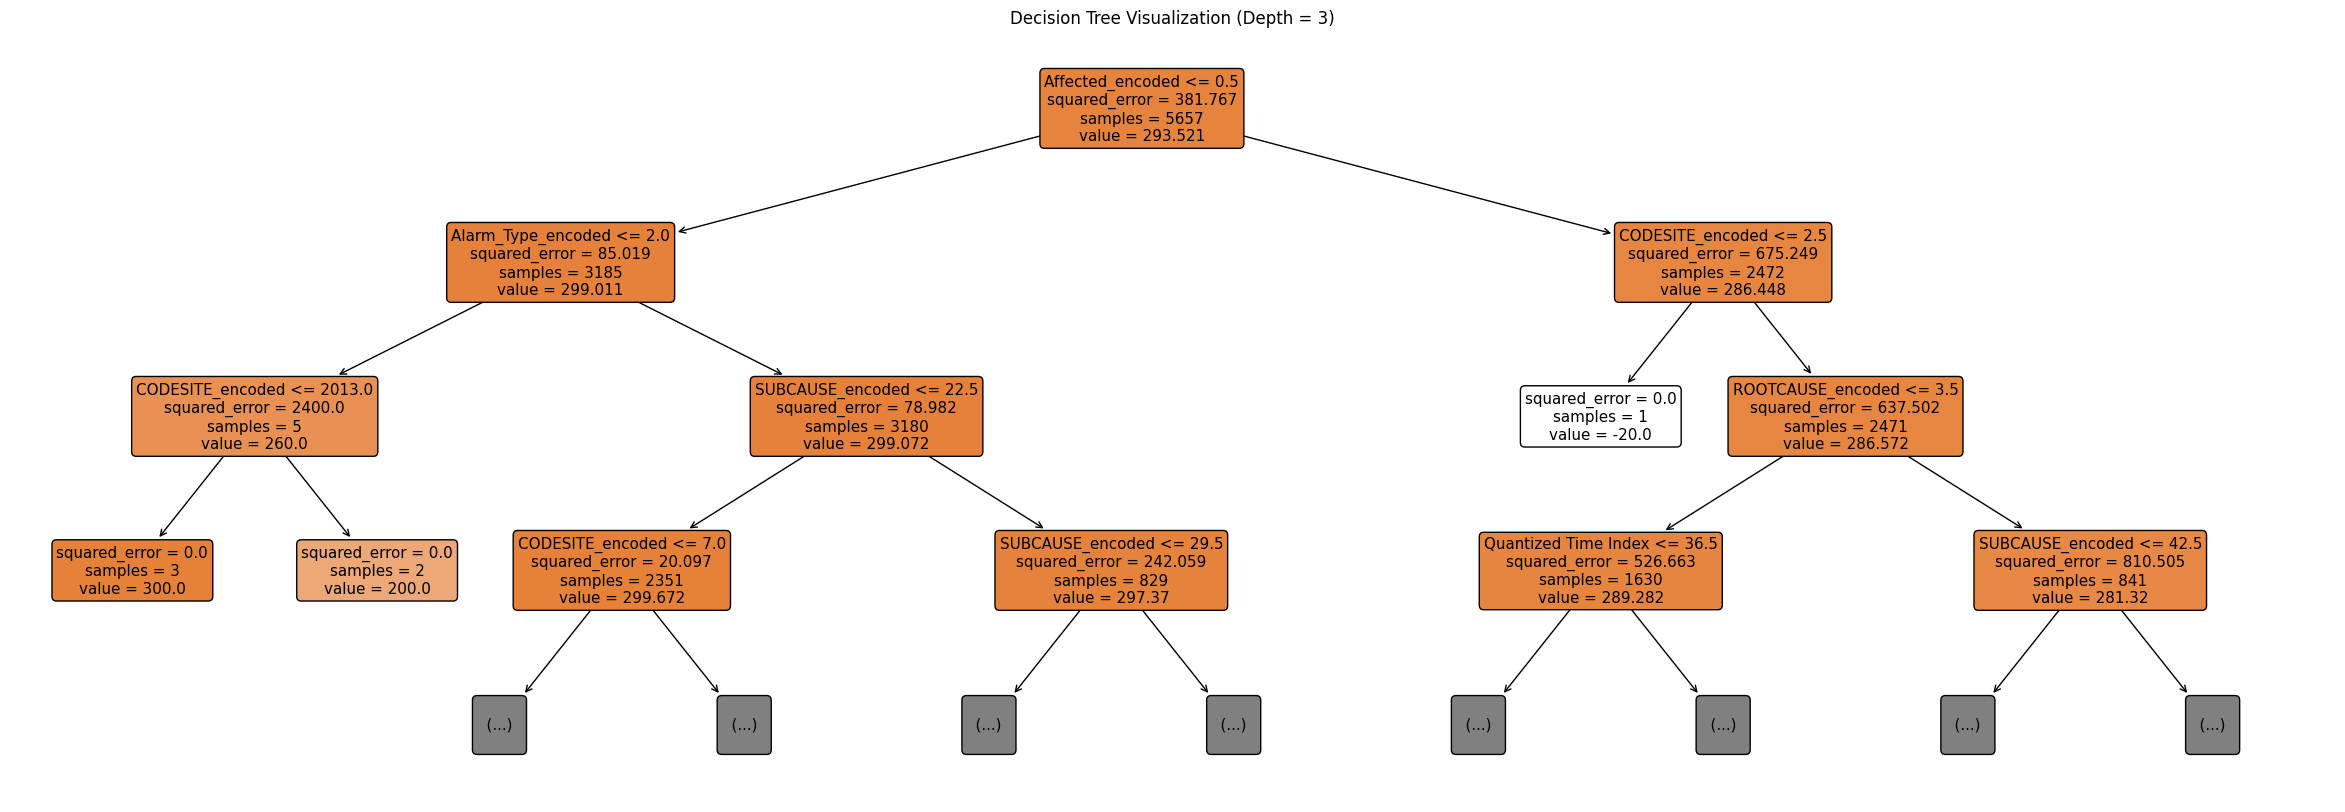

In [ ]:
# Visualize a portion of the decision tree
plt.figure(figsize=(30, 10))
plot_tree(reg, max_depth=3, filled=True, feature_names=X.columns, rounded=True)
plt.title("Decision Tree Visualization (Depth = 3)")
plt.show()

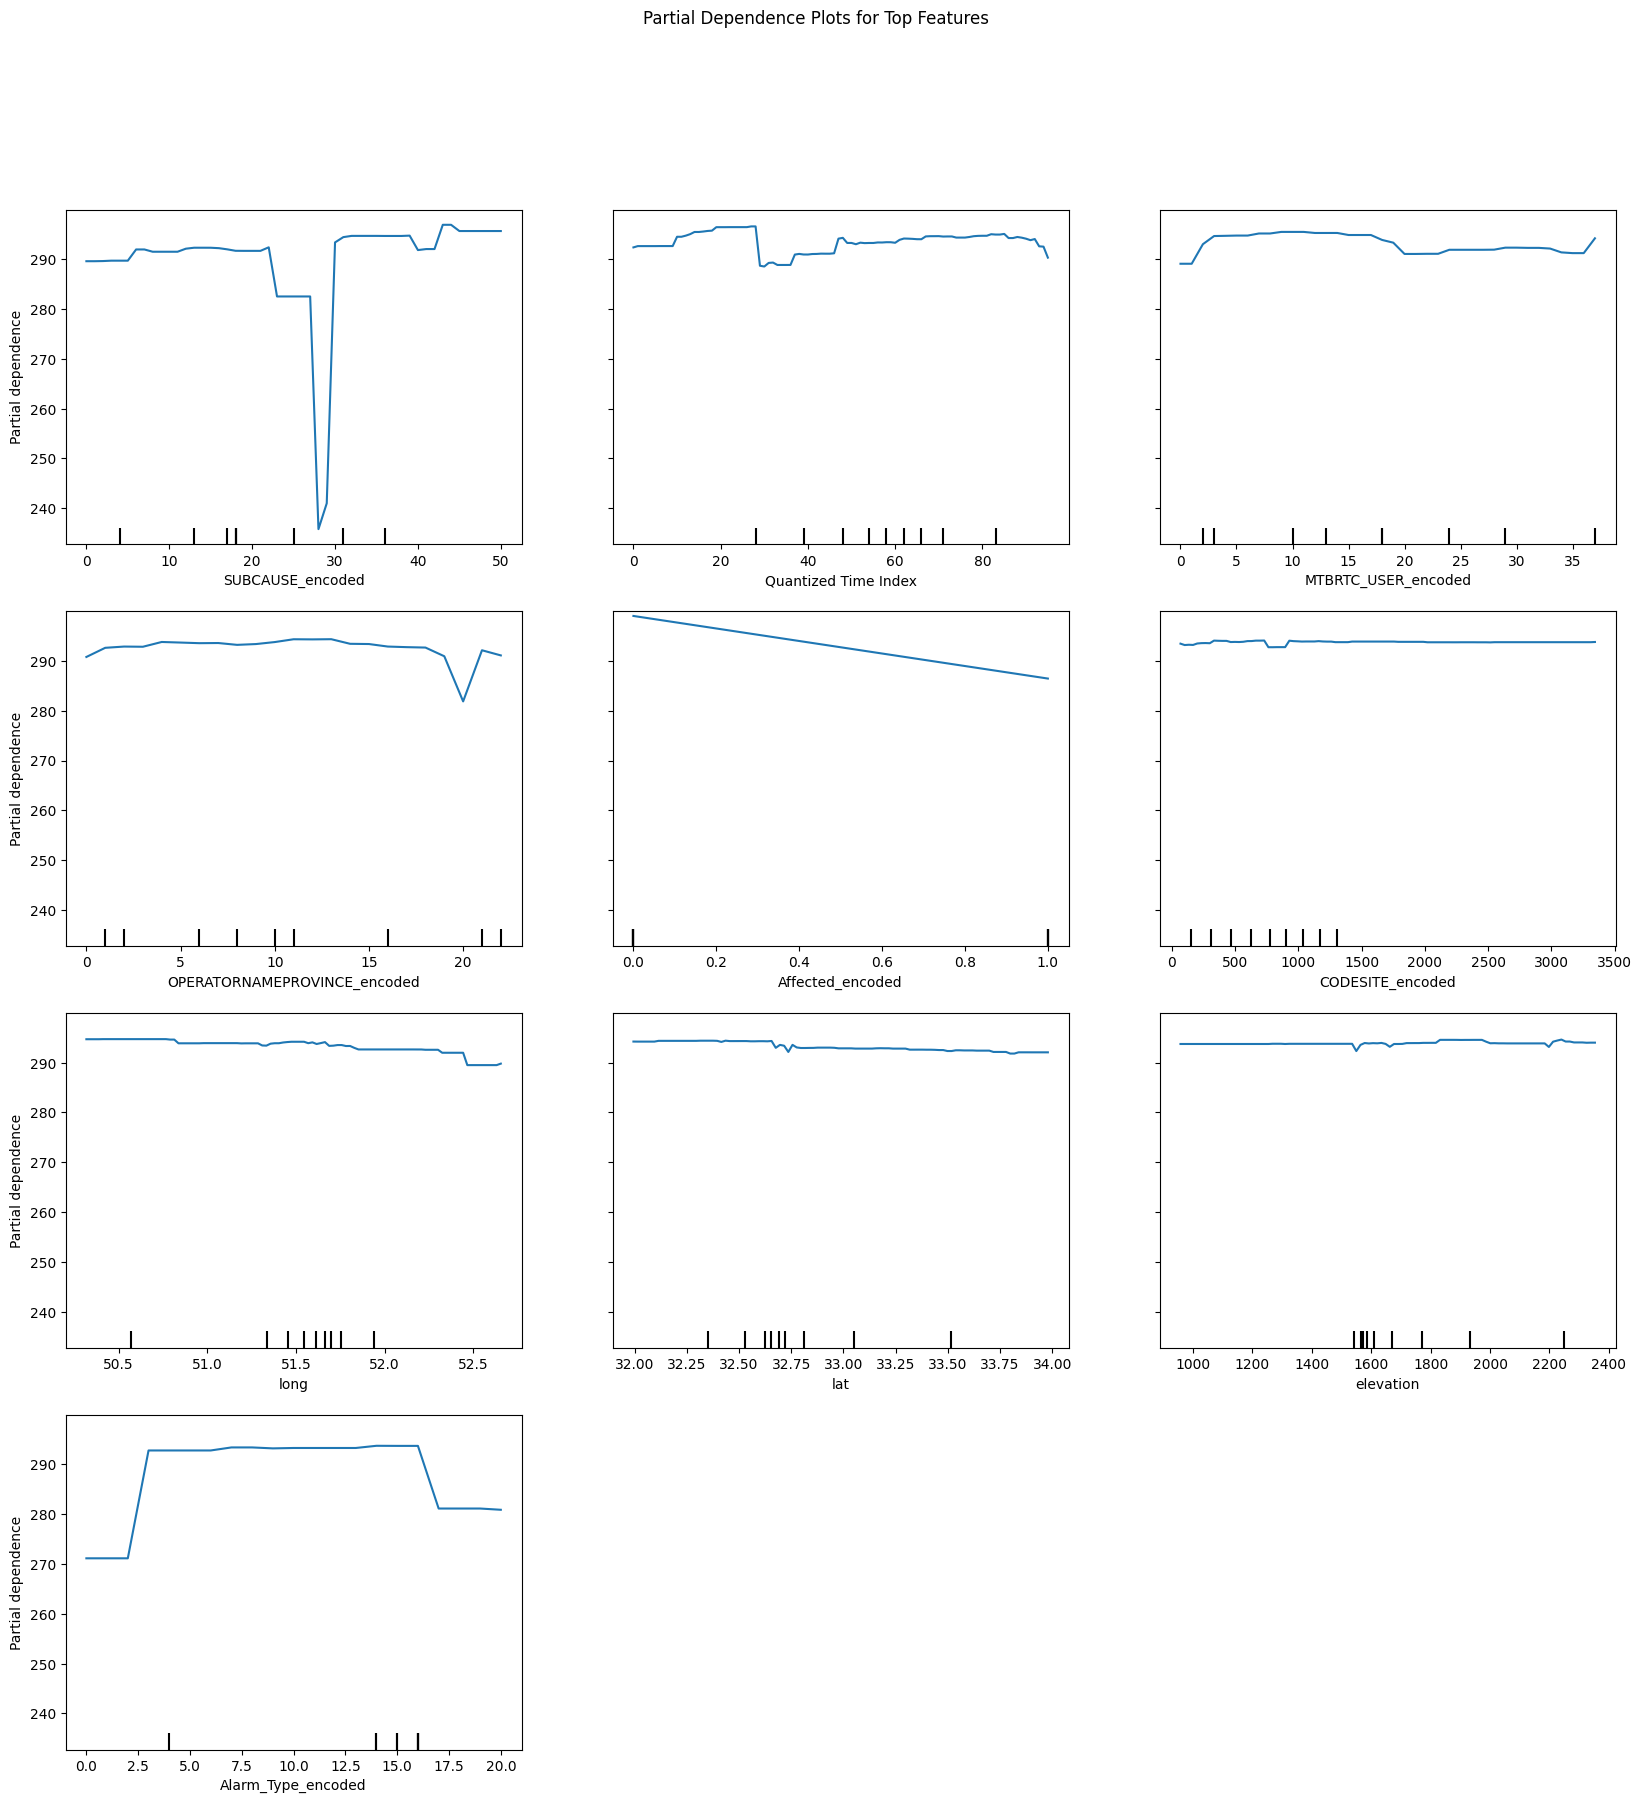

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay, partial_dependence

# Assuming reg is your trained model and X is your feature DataFrame

# Feature Importance
importances = reg.feature_importances_
indices = np.argsort(importances)[::-1]

# Get the top N features
top_n = 10
top_features = X.columns[indices][:top_n]

# 3. Partial Dependence Plots for the Top N Features
fig, ax = plt.subplots(figsize=(20, 20))
pdp = PartialDependenceDisplay.from_estimator(reg, X, features=top_features, feature_names=X.columns, ax=ax)
plt.suptitle('Partial Dependence Plots for Top Features')
plt.show()

In [ ]:
def contains_encoded(string):
    return "_encoded" in string.lower()

# Create a dictionary to store the maximum values, their corresponding features, and their maximum feature values
max_values = {}

# Loop through the top features to find max values and their corresponding feature values
for feature in top_features:
    # Calculate the partial dependence values for the feature
    pd_result = partial_dependence(reg, X, features=[feature])

    # Extract the average partial dependence values and grid from the result
    pd_values = pd_result['average'][0]  # Access the average partial dependence values

    # Get the maximum value from the partial dependence values
    max_value = pd_values.max()  # Get the maximum value from the array

    # Get the corresponding feature value for the maximum partial dependence
    # Find the index of the maximum partial dependence value
    max_index = pd_values.argmax()  # Get the index of the maximum partial dependence value
    corresponding_feature_value = pd_result['grid_values'][0][max_index]  # Get the feature value at that index

    # Store the maximum partial dependence value and the corresponding feature value
    max_values[feature] = (max_value, corresponding_feature_value)
    if contains_encoded(feature):
      decode = feature.replace("_encoded", "")
      result = data.loc[data[feature] == int(corresponding_feature_value), decode]
      print(f"Maximum partial dependence value for {feature}: {max_value} at feature value:   {result.values[0]}")
    else:
      print(f"Maximum partial dependence value for {feature}: {max_value} at feature value:   {corresponding_feature_value}")

Maximum partial dependence value for SUBCAUSE_encoded: 296.8885561458796 at feature value:   TRANSMISSION-TCX LINK FLUCTUATE
Maximum partial dependence value for Quantized Time Index: 296.5657364341051 at feature value:   27
Maximum partial dependence value for MTBRTC_USER_encoded: 295.4611582843759 at feature value:   Arman maarfavi
Maximum partial dependence value for OPERATORNAMEPROVINCE_encoded: 294.3468013248624 at feature value:   Reza Ansaripour
Maximum partial dependence value for Affected_encoded: 299.0109890109891 at feature value:   NO
Maximum partial dependence value for CODESITE_encoded: 294.0811974872647 at feature value:   ES1019
Maximum partial dependence value for long: 294.71024737614766 at feature value:   50.412256262626265
Maximum partial dependence value for lat: 294.4013510791087 at feature value:   32.435669724444445
Maximum partial dependence value for elevation: 294.62139111738765 at feature value:   2240.272727272727
Maximum partial dependence value for Alarm

## Target: MTTR

In [ ]:
# Specify the target variable
target_column = 'MTTR'  # Replace with the name of your target column

# Select specific columns for features (X)
# Replace 'Column1', 'Column2', ... with the actual names of the columns you want
X = data[['CODESITE_encoded', 'lat', 'long', 'elevation', 'Quantized Time Index', 'MTBRTC_USER_encoded', 'Alarm_Type_encoded', 'FAULTLEVEL_encoded', 'Affected_encoded', 'PRODUCT_TYPE_encoded', 'orginator group_encoded', 'OPERATORNAMEPROVINCE_encoded', 'SUBCAUSE_encoded', 'ROOTCAUSE_encoded']]  # Specify the columns you want to include in X
y = data[target_column]  # Target variable

In [ ]:
# Initialize the Decision Tree Regressor
reg = DecisionTreeRegressor(random_state=42)

# Train the model on the entire dataset
reg.fit(X, y)

DecisionTreeRegressor(random_state=42)

                         Feature    Importance
1                            lat  2.578358e-01
3                      elevation  1.920150e-01
6             Alarm_Type_encoded  1.789502e-01
4           Quantized Time Index  1.007073e-01
12              SUBCAUSE_encoded  9.542150e-02
2                           long  8.530032e-02
0               CODESITE_encoded  2.941133e-02
10       orginator group_encoded  2.887304e-02
11  OPERATORNAMEPROVINCE_encoded  1.567915e-02
8               Affected_encoded  7.203285e-03
13             ROOTCAUSE_encoded  4.926373e-03
5            MTBRTC_USER_encoded  3.671324e-03
7             FAULTLEVEL_encoded  5.289268e-06
9           PRODUCT_TYPE_encoded  4.251893e-09


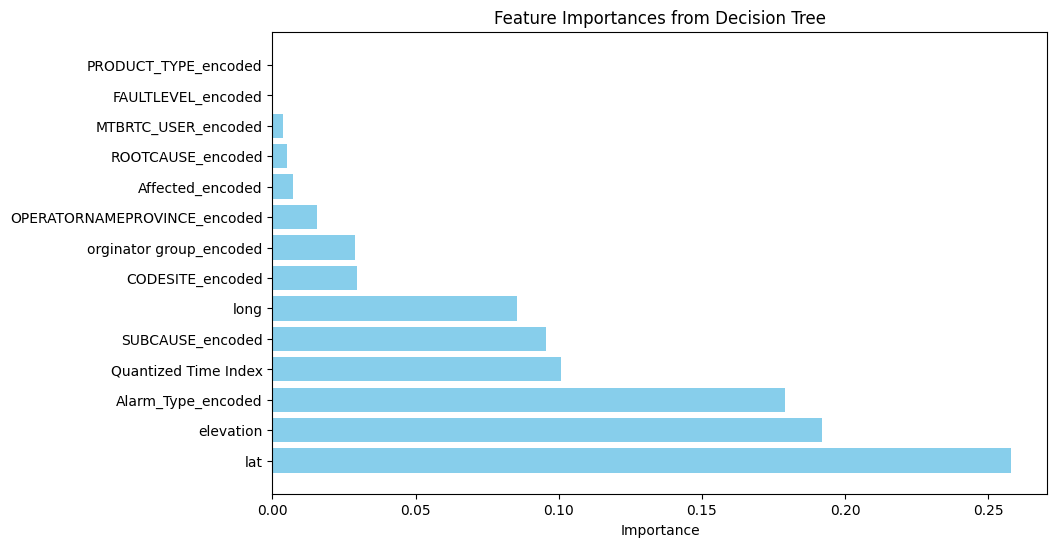

In [ ]:
# Get feature importances
feature_importances = reg.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Decision Tree')
plt.show()

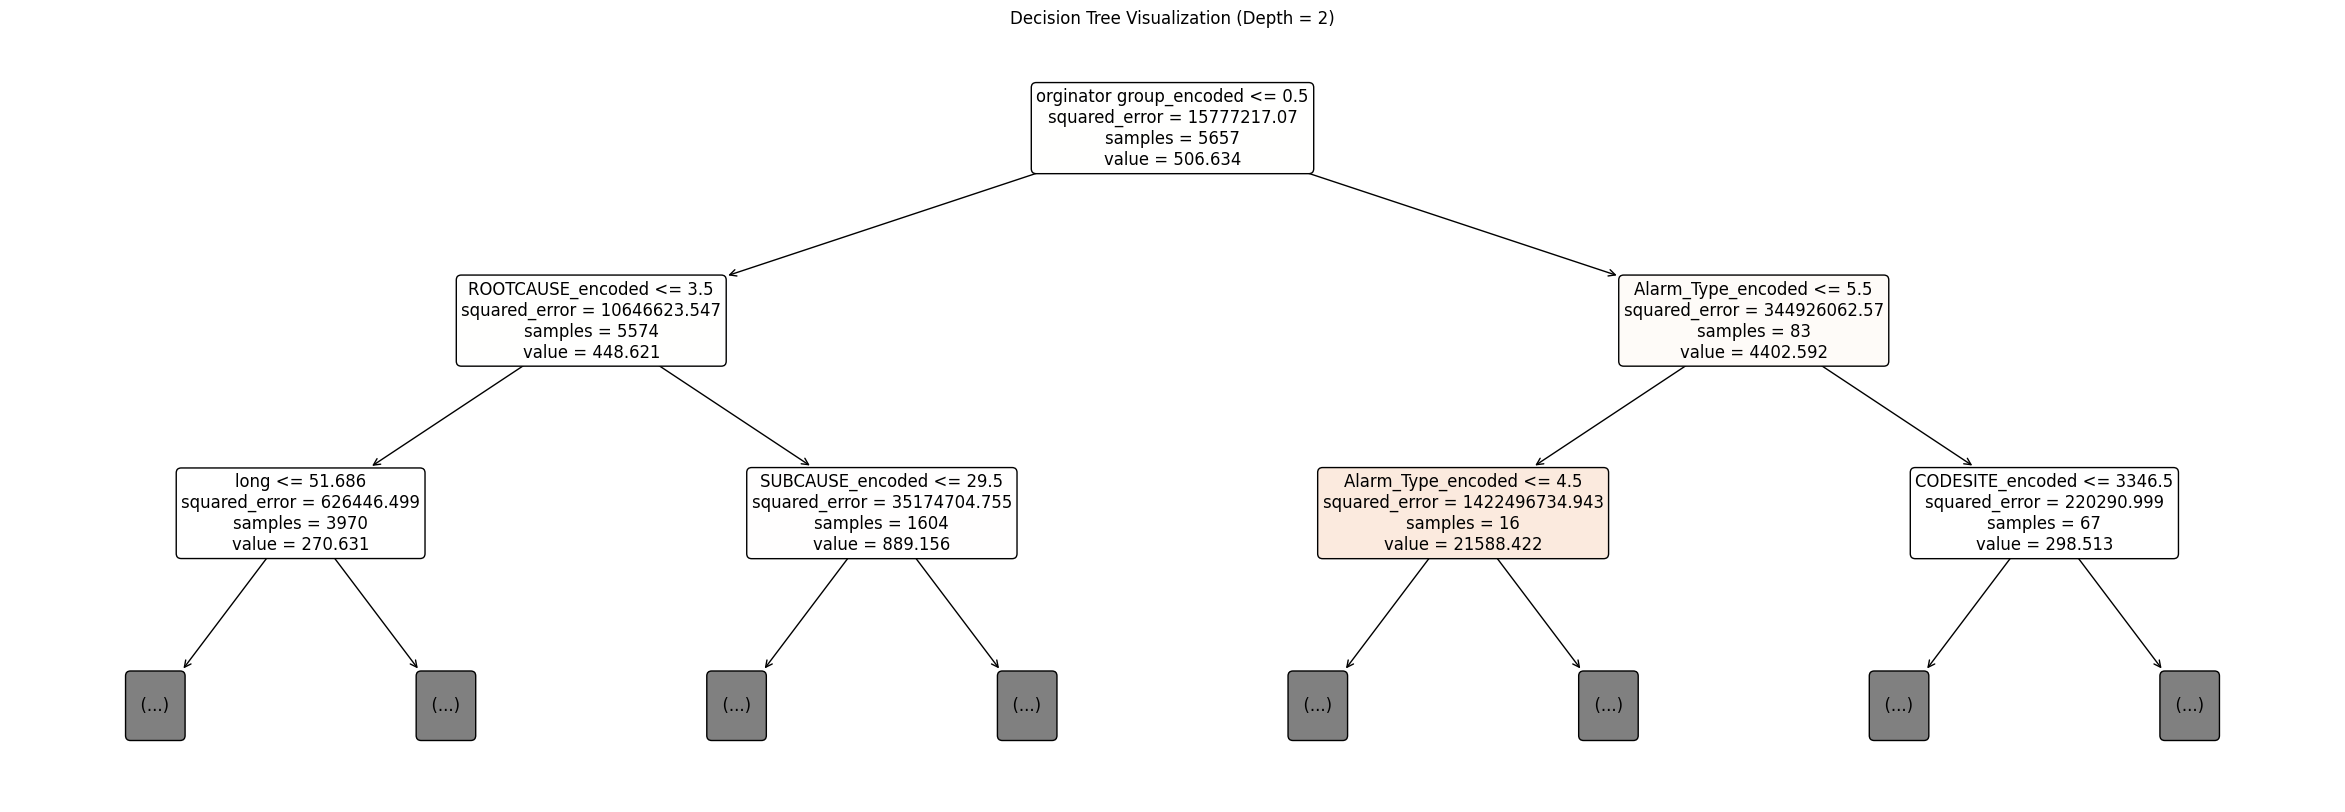

In [ ]:
# Visualize a portion of the decision tree
plt.figure(figsize=(30, 10))
plot_tree(reg, max_depth=2, filled=True, feature_names=X.columns, rounded=True)
plt.title("Decision Tree Visualization (Depth = 2)")
plt.show()

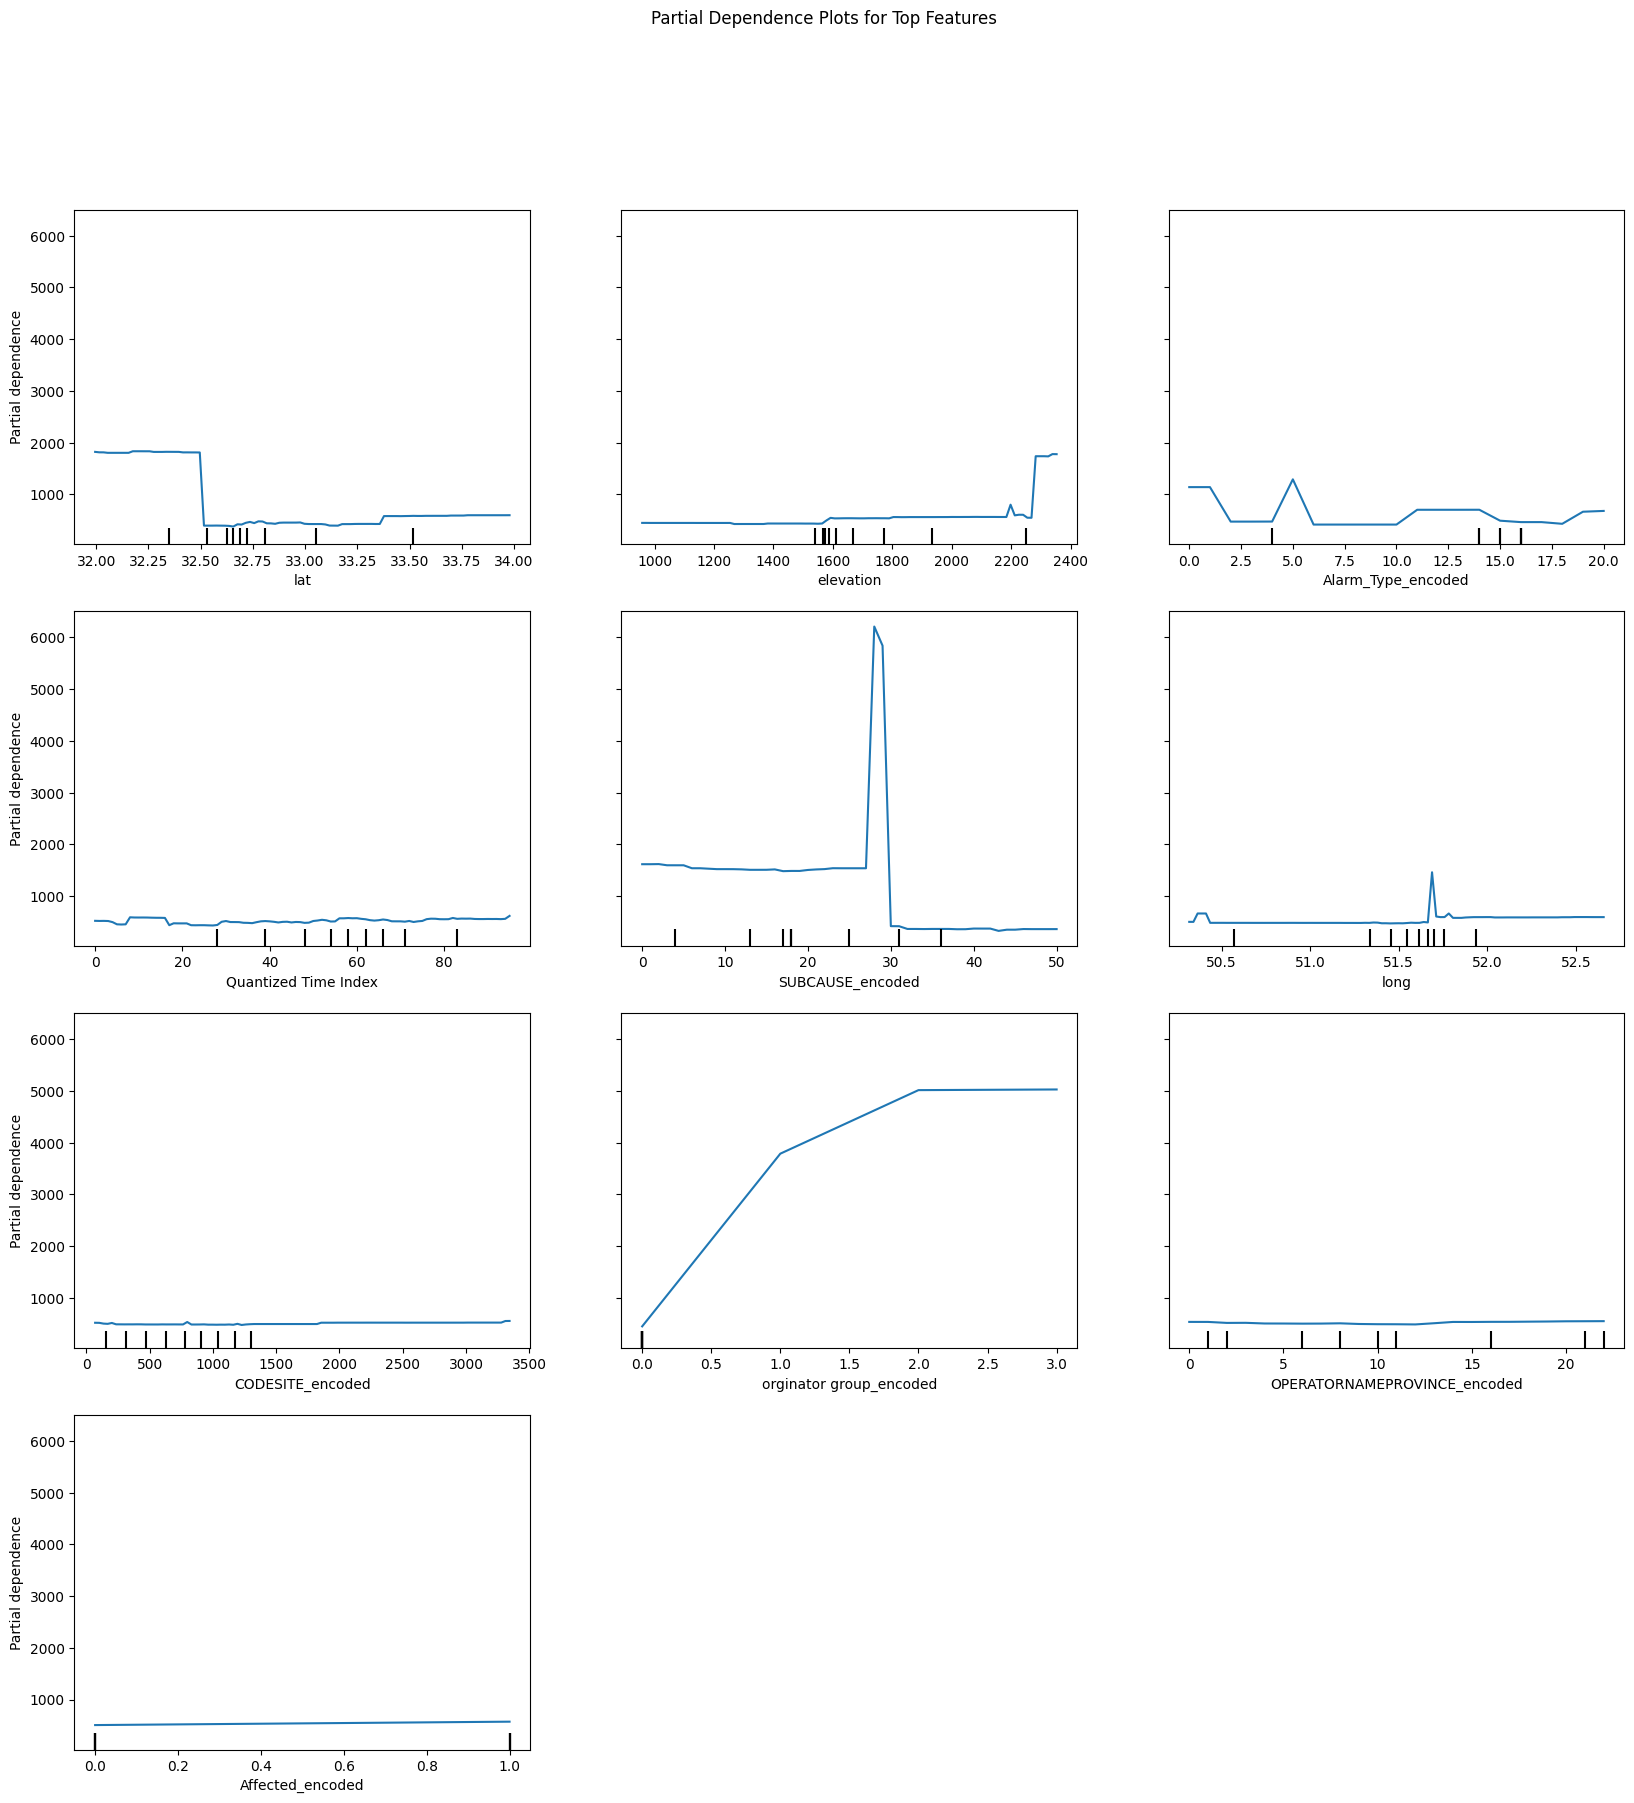

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay, partial_dependence

# Assuming reg is your trained model and X is your feature DataFrame

# Feature Importance
importances = reg.feature_importances_
indices = np.argsort(importances)[::-1]

# Get the top N features
top_n = 10
top_features = X.columns[indices][:top_n]

# 3. Partial Dependence Plots for the Top N Features
fig, ax = plt.subplots(figsize=(20, 20))
pdp = PartialDependenceDisplay.from_estimator(reg, X, features=top_features, feature_names=X.columns, ax=ax, kind='average')
plt.suptitle('Partial Dependence Plots for Top Features')
plt.show()

In [ ]:
def contains_encoded(string):
    return "_encoded" in string.lower()

# Create a dictionary to store the maximum values, their corresponding features, and their maximum feature values
max_values = {}

# Loop through the top features to find max values and their corresponding feature values
for feature in top_features:
    # Calculate the partial dependence values for the feature
    pd_result = partial_dependence(reg, X, features=[feature])

    # Extract the average partial dependence values and grid from the result
    pd_values = pd_result['average'][0]  # Access the average partial dependence values

    # Get the maximum value from the partial dependence values
    max_value = pd_values.max()  # Get the maximum value from the array

    # Get the corresponding feature value for the maximum partial dependence
    # Find the index of the maximum partial dependence value
    max_index = pd_values.argmax()  # Get the index of the maximum partial dependence value
    corresponding_feature_value = pd_result['grid_values'][0][max_index]  # Get the feature value at that index

    # Store the maximum partial dependence value and the corresponding feature value
    max_values[feature] = (max_value, corresponding_feature_value)
    if contains_encoded(feature):
      decode = feature.replace("_encoded", "")
      result = data.loc[data[feature] == int(corresponding_feature_value), decode]
      print(f"Maximum partial dependence value for {feature}: {max_value} at feature value:   {result.values[0]}")
    else:
      print(f"Maximum partial dependence value for {feature}: {max_value} at feature value:   {corresponding_feature_value}")

Maximum partial dependence value for lat: 1833.1181213760194 at feature value:   32.175147145454545
Maximum partial dependence value for elevation: 1777.9307200044889 at feature value:   2338.909090909091
Maximum partial dependence value for Alarm_Type_encoded: 1290.350430440057 at feature value:   EXT-HIGHTEMP
Maximum partial dependence value for Quantized Time Index: 617.5148829088349 at feature value:   95
Maximum partial dependence value for SUBCAUSE_encoded: 6209.662382819409 at feature value:   RAN HW&SW-BTS UNIT FAULT-KOOYE KAN
Maximum partial dependence value for long: 1460.5606611187966 at feature value:   51.68755080808081
Maximum partial dependence value for CODESITE_encoded: 553.3800630457931 at feature value:   ES6541
Maximum partial dependence value for orginator group_encoded: 5026.996947791165 at feature value:   NAK_NetworkOperation_FO_TRS
Maximum partial dependence value for OPERATORNAMEPROVINCE_encoded: 549.3592455118107 at feature value:   shadi tabrizi
Maximum part

## Target: MTRBTC

In [ ]:
# Specify the target variable
target_column = 'MTRBTC'  # Replace with the name of your target column

# Select specific columns for features (X)
# Replace 'Column1', 'Column2', ... with the actual names of the columns you want
X = data[['CODESITE_encoded', 'lat', 'long', 'elevation', 'Quantized Time Index', 'MTBRTC_USER_encoded', 'Alarm_Type_encoded', 'FAULTLEVEL_encoded', 'Affected_encoded', 'PRODUCT_TYPE_encoded', 'orginator group_encoded', 'OPERATORNAMEPROVINCE_encoded', 'SUBCAUSE_encoded', 'ROOTCAUSE_encoded']]  # Specify the columns you want to include in X
y = data[target_column]  # Target variable

In [ ]:
# Initialize the Decision Tree Regressor
reg = DecisionTreeRegressor(random_state=42)

# Train the model on the entire dataset
reg.fit(X, y)

DecisionTreeRegressor(random_state=42)

                         Feature    Importance
0               CODESITE_encoded  3.409813e-01
5            MTBRTC_USER_encoded  3.154997e-01
1                            lat  1.239367e-01
4           Quantized Time Index  6.079644e-02
2                           long  4.117447e-02
3                      elevation  3.144447e-02
12              SUBCAUSE_encoded  3.025572e-02
6             Alarm_Type_encoded  2.280423e-02
11  OPERATORNAMEPROVINCE_encoded  2.235339e-02
13             ROOTCAUSE_encoded  7.709638e-03
8               Affected_encoded  1.353707e-03
10       orginator group_encoded  9.539015e-04
7             FAULTLEVEL_encoded  7.360519e-04
9           PRODUCT_TYPE_encoded  3.273696e-07


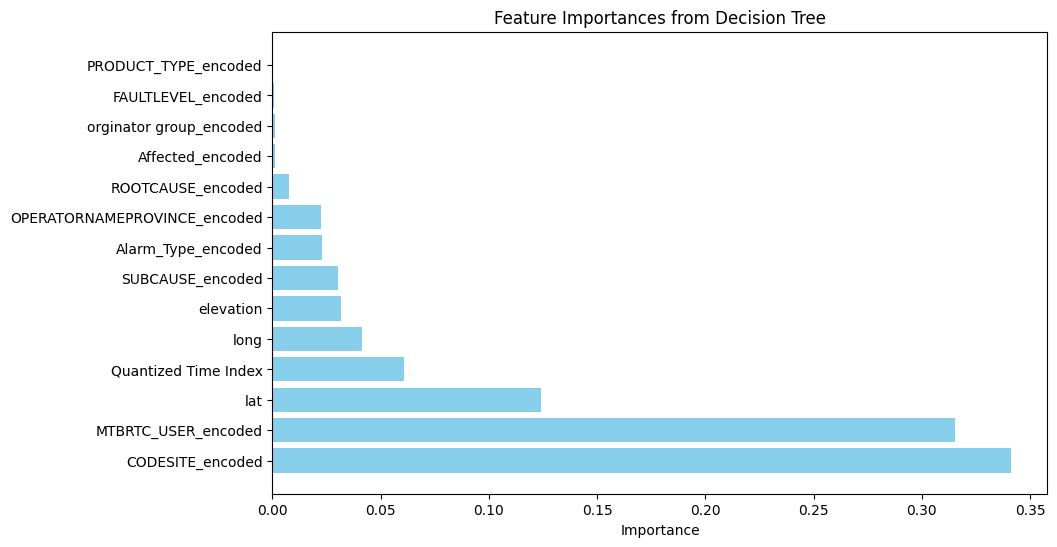

In [ ]:
# Get feature importances
feature_importances = reg.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Decision Tree')
plt.show()

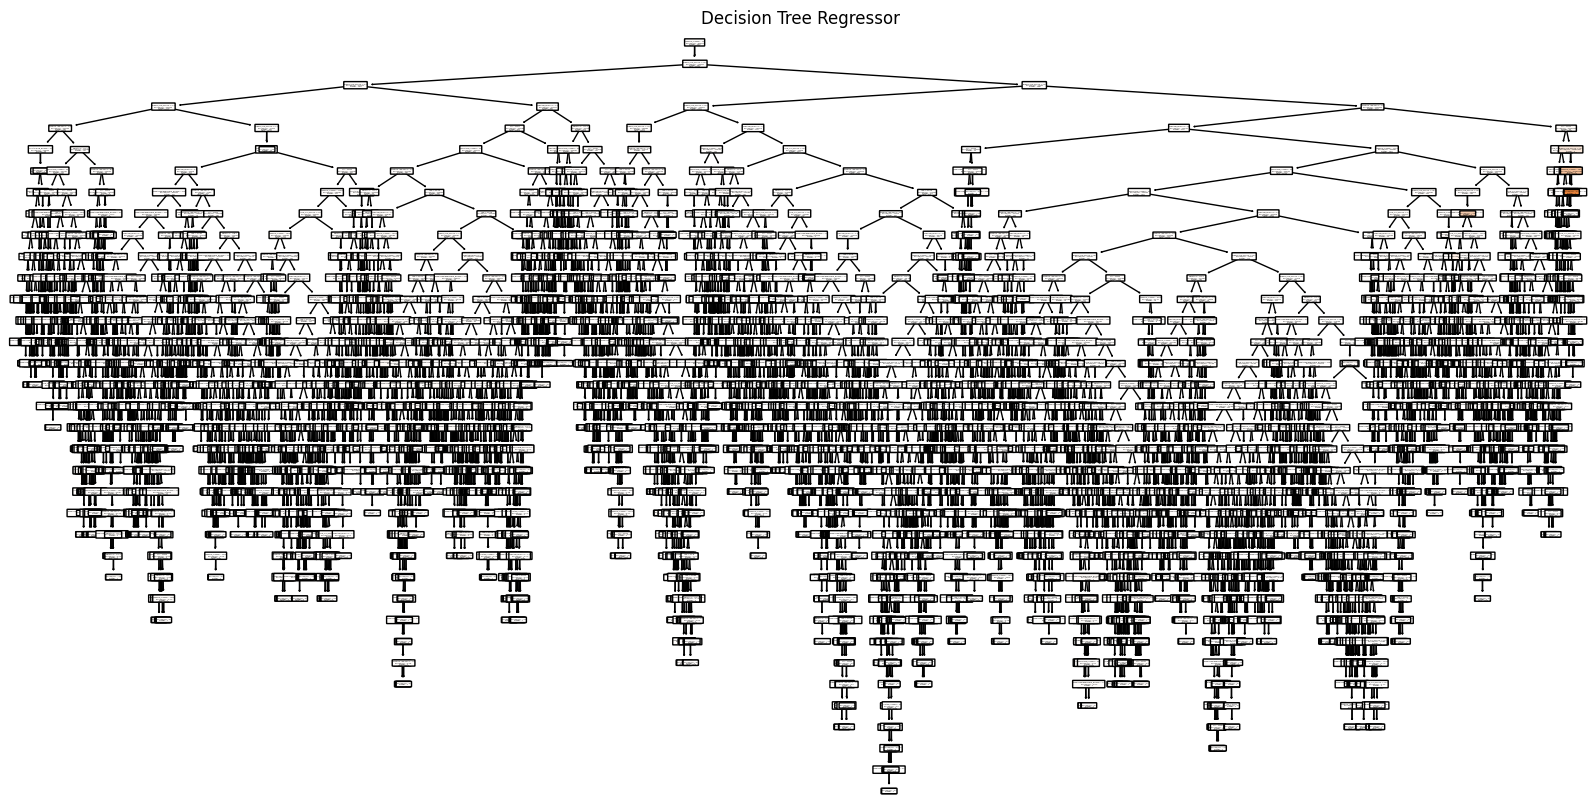

In [ ]:
# Visualizing the Decision Tree Structure
plt.figure(figsize=(20, 10))
plot_tree(reg, feature_names=X.columns, filled=True, rounded=True)
plt.title('Decision Tree Regressor')
plt.show()

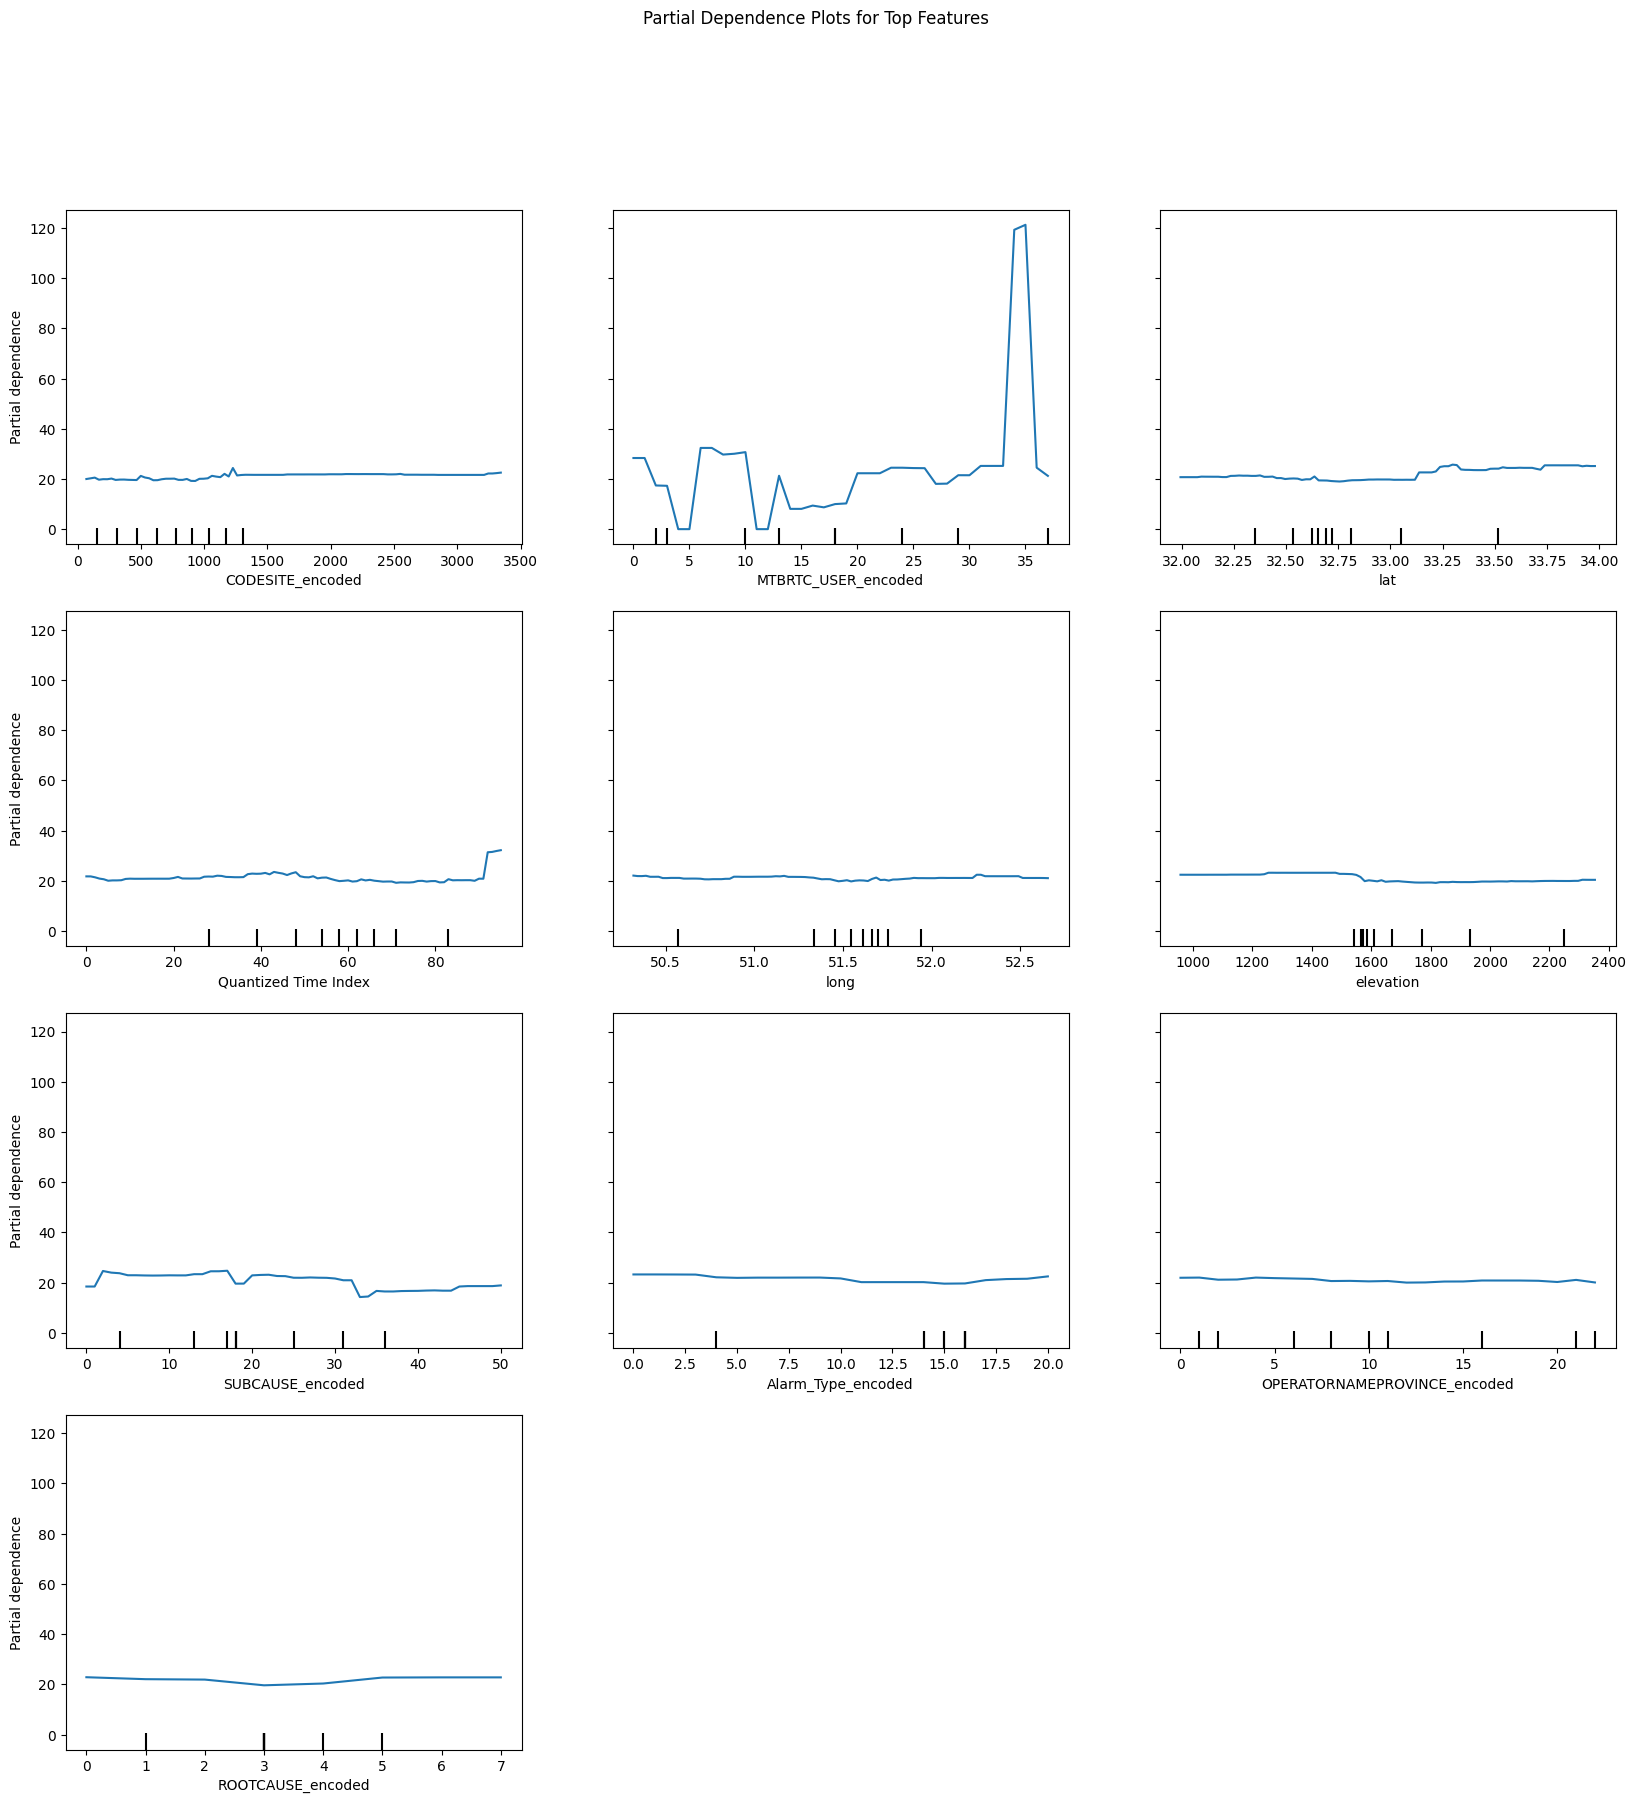

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay, partial_dependence

# Assuming reg is your trained model and X is your feature DataFrame

# Feature Importance
importances = reg.feature_importances_
indices = np.argsort(importances)[::-1]

# Get the top N features
top_n = 10
top_features = X.columns[indices][:top_n]

# 3. Partial Dependence Plots for the Top N Features
fig, ax = plt.subplots(figsize=(20, 20))
pdp = PartialDependenceDisplay.from_estimator(reg, X, features=top_features, feature_names=X.columns, ax=ax)
plt.suptitle('Partial Dependence Plots for Top Features')
plt.show()

In [ ]:
def contains_encoded(string):
    return "_encoded" in string.lower()

# Create a dictionary to store the maximum values, their corresponding features, and their maximum feature values
max_values = {}

# Loop through the top features to find max values and their corresponding feature values
for feature in top_features:
    # Calculate the partial dependence values for the feature
    pd_result = partial_dependence(reg, X, features=[feature])

    # Extract the average partial dependence values and grid from the result
    pd_values = pd_result['average'][0]  # Access the average partial dependence values

    # Get the maximum value from the partial dependence values
    max_value = pd_values.max()  # Get the maximum value from the array

    # Get the corresponding feature value for the maximum partial dependence
    # Find the index of the maximum partial dependence value
    max_index = pd_values.argmax()  # Get the index of the maximum partial dependence value
    corresponding_feature_value = pd_result['grid_values'][0][max_index]  # Get the feature value at that index

    # Store the maximum partial dependence value and the corresponding feature value
    max_values[feature] = (max_value, corresponding_feature_value)
    if contains_encoded(feature):
      decode = feature.replace("_encoded", "")
      result = data.loc[data[feature] == int(corresponding_feature_value), decode]
      print(f"Maximum partial dependence value for {feature}: {max_value} at feature value:   {result.values[0]}")
    else:
      print(f"Maximum partial dependence value for {feature}: {max_value} at feature value:   {corresponding_feature_value}")

Maximum partial dependence value for CODESITE_encoded: 24.46022765079007 at feature value:   ES1736
Maximum partial dependence value for MTBRTC_USER_encoded: 121.28591401865232 at feature value:   majid mahmoodabadi
Maximum partial dependence value for lat: 25.80497856567602 at feature value:   33.2973982549495
Maximum partial dependence value for Quantized Time Index: 32.24290374829652 at feature value:   95
Maximum partial dependence value for long: 22.465002966081634 at feature value:   52.27796494949495
Maximum partial dependence value for elevation: 23.27617173968232 at feature value:   1479.3636363636365
Maximum partial dependence value for SUBCAUSE_encoded: 24.754958526507448 at feature value:   POWER-LACK OF BATTERY BACKUP
Maximum partial dependence value for Alarm_Type_encoded: 23.282236577566678 at feature value:   BTS_CATEGORY
Maximum partial dependence value for OPERATORNAMEPROVINCE_encoded: 22.03055542865649 at feature value:   Ahmad Kharaji
Maximum partial dependence valu

## Target: MTTA

In [ ]:
# Specify the target variable
target_column = 'MTTA'  # Replace with the name of your target column

# Select specific columns for features (X)
# Replace 'Column1', 'Column2', ... with the actual names of the columns you want
X = data[['CODESITE_encoded', 'lat', 'long', 'elevation', 'Quantized Time Index', 'MTBRTC_USER_encoded', 'Alarm_Type_encoded', 'FAULTLEVEL_encoded', 'Affected_encoded', 'PRODUCT_TYPE_encoded', 'orginator group_encoded', 'OPERATORNAMEPROVINCE_encoded', 'SUBCAUSE_encoded', 'ROOTCAUSE_encoded']]  # Specify the columns you want to include in X
y = data[target_column].astype(int)  # Target variable

In [ ]:
# Initialize the Decision Tree Regressor
reg = DecisionTreeRegressor(random_state=42)

# Train the model on the entire dataset
reg.fit(X, y)

DecisionTreeRegressor(random_state=42)

                         Feature  Importance
0               CODESITE_encoded    0.320674
3                      elevation    0.119328
4           Quantized Time Index    0.108395
1                            lat    0.096427
2                           long    0.091540
5            MTBRTC_USER_encoded    0.086281
12              SUBCAUSE_encoded    0.060726
11  OPERATORNAMEPROVINCE_encoded    0.046328
6             Alarm_Type_encoded    0.038778
13             ROOTCAUSE_encoded    0.017538
8               Affected_encoded    0.011095
7             FAULTLEVEL_encoded    0.001968
10       orginator group_encoded    0.000917
9           PRODUCT_TYPE_encoded    0.000004


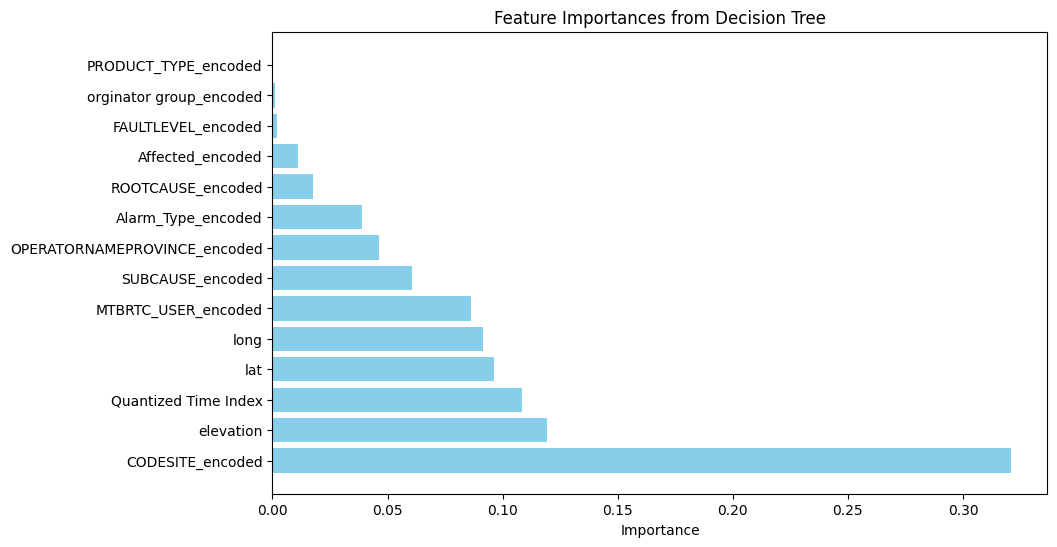

In [ ]:
# Get feature importances
feature_importances = reg.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Decision Tree')
plt.show()

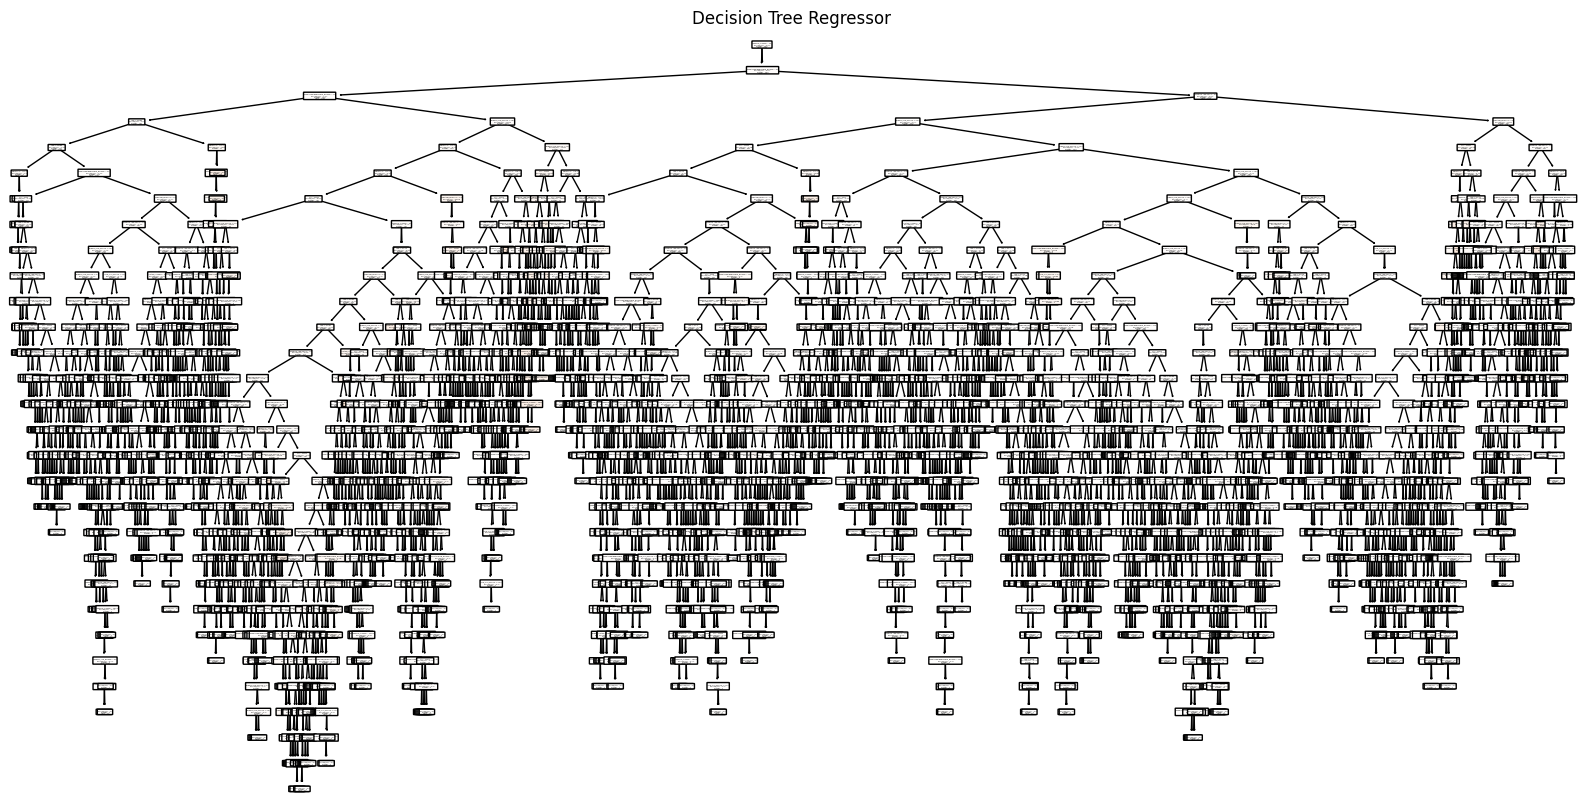

In [ ]:
# Visualizing the Decision Tree Structure
plt.figure(figsize=(20, 10))
plot_tree(reg, feature_names=X.columns, filled=True, rounded=True)
plt.title('Decision Tree Regressor')
plt.show()

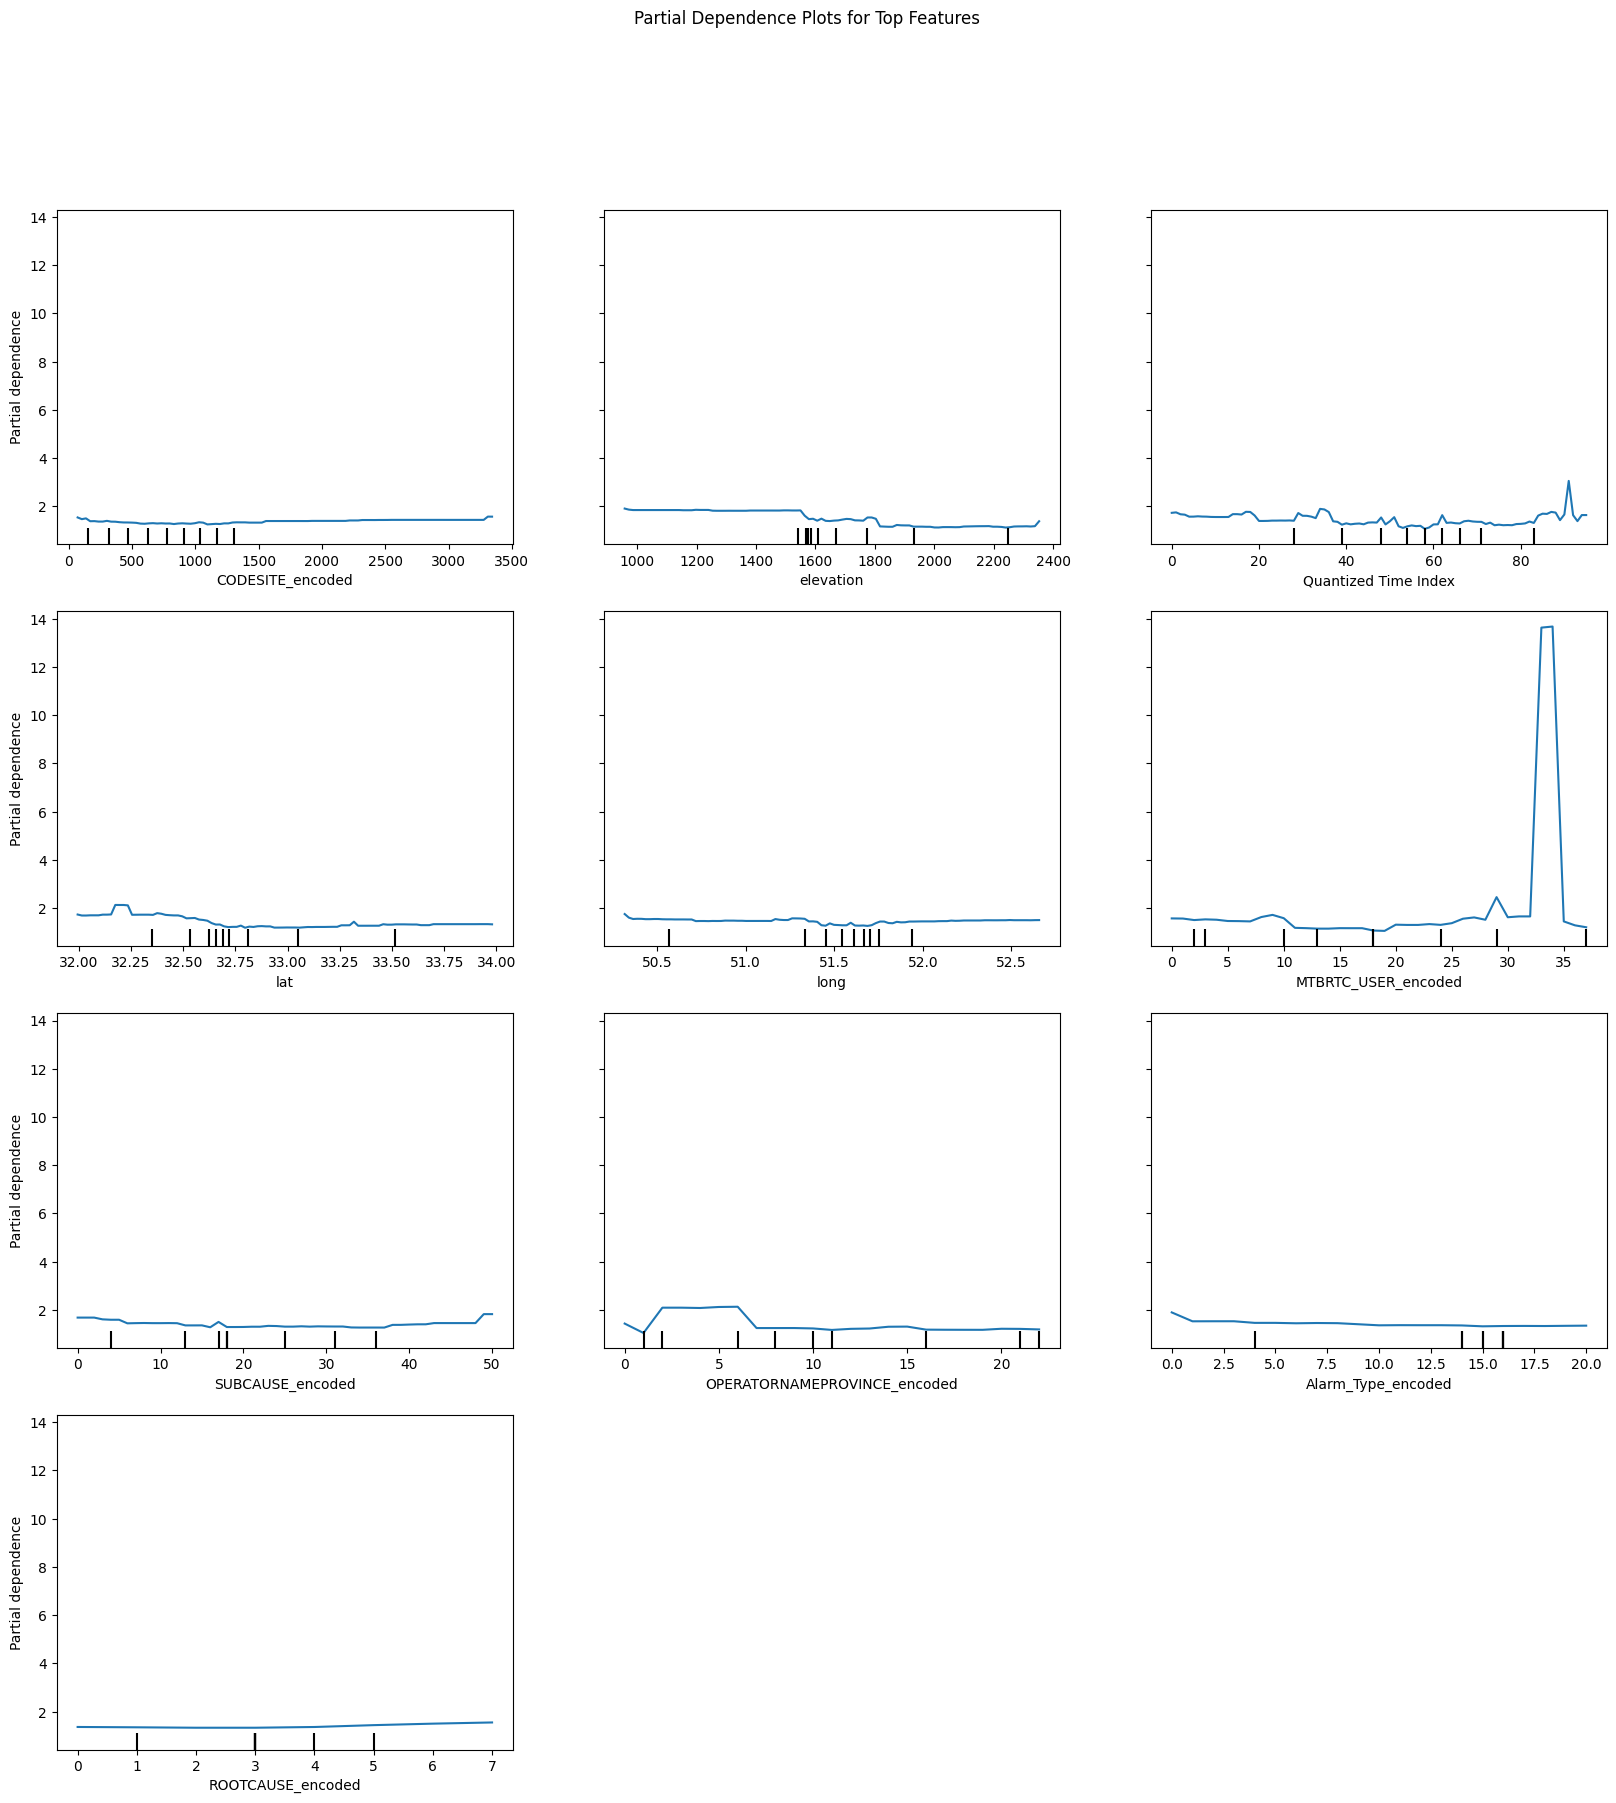

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay, partial_dependence

# Assuming reg is your trained model and X is your feature DataFrame

# Feature Importance
importances = reg.feature_importances_
indices = np.argsort(importances)[::-1]

# Get the top N features
top_n = 10
top_features = X.columns[indices][:top_n]

# 3. Partial Dependence Plots for the Top N Features
fig, ax = plt.subplots(figsize=(20, 20))
pdp = PartialDependenceDisplay.from_estimator(reg, X, features=top_features, feature_names=X.columns, ax=ax)
plt.suptitle('Partial Dependence Plots for Top Features')
plt.show()

In [ ]:
def contains_encoded(string):
    return "_encoded" in string.lower()

# Create a dictionary to store the maximum values, their corresponding features, and their maximum feature values
max_values = {}

# Loop through the top features to find max values and their corresponding feature values
for feature in top_features:
    # Calculate the partial dependence values for the feature
    pd_result = partial_dependence(reg, X, features=[feature])

    # Extract the average partial dependence values and grid from the result
    pd_values = pd_result['average'][0]  # Access the average partial dependence values

    # Get the maximum value from the partial dependence values
    max_value = pd_values.max()  # Get the maximum value from the array

    # Get the corresponding feature value for the maximum partial dependence
    # Find the index of the maximum partial dependence value
    max_index = pd_values.argmax()  # Get the index of the maximum partial dependence value
    corresponding_feature_value = pd_result['grid_values'][0][max_index]  # Get the feature value at that index

    # Store the maximum partial dependence value and the corresponding feature value
    max_values[feature] = (max_value, corresponding_feature_value)
    if contains_encoded(feature):
      decode = feature.replace("_encoded", "")
      result = data.loc[data[feature] == int(corresponding_feature_value), decode]
      print(f"Maximum partial dependence value for {feature}: {max_value} at feature value:   {result.values[0]}")
    else:
      print(f"Maximum partial dependence value for {feature}: {max_value} at feature value:   {corresponding_feature_value}")

Maximum partial dependence value for CODESITE_encoded: 1.5763111656201814 at feature value:   ES5010
Maximum partial dependence value for elevation: 1.909763955120546 at feature value:   958.0
Maximum partial dependence value for Quantized Time Index: 3.0569914479186386 at feature value:   91
Maximum partial dependence value for lat: 2.1318994353773633 at feature value:   32.175147145454545
Maximum partial dependence value for long: 1.7548510318496517 at feature value:   50.31779
Maximum partial dependence value for MTBRTC_USER_encoded: 13.678718091087296 at feature value:   eisa asadi
Maximum partial dependence value for SUBCAUSE_encoded: 1.8234473526626853 at feature value:   WITHOUT CR- NI, ROLL OUT
Maximum partial dependence value for OPERATORNAMEPROVINCE_encoded: 2.1298063335143285 at feature value:   Dina Sadat Navabi
Maximum partial dependence value for Alarm_Type_encoded: 1.894931048353055 at feature value:   BTS_CATEGORY
Maximum partial dependence value for ROOTCAUSE_encoded: 

# **PART 5 [Training models]**

## upload data

In [ ]:
# Upload the Excel file
uploaded = files.upload()

Saving Final_Tickets.xlsx to Final_Tickets.xlsx


In [ ]:
# Load your dataset
file_path = 'Final_Tickets.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

## Predictions

In [ ]:
pip install pandas scikit-learn matplotlib openpyxl

### prediction base on linear Regrresion

Root Mean Squared Error: 3682.23
R-squared: 0.21


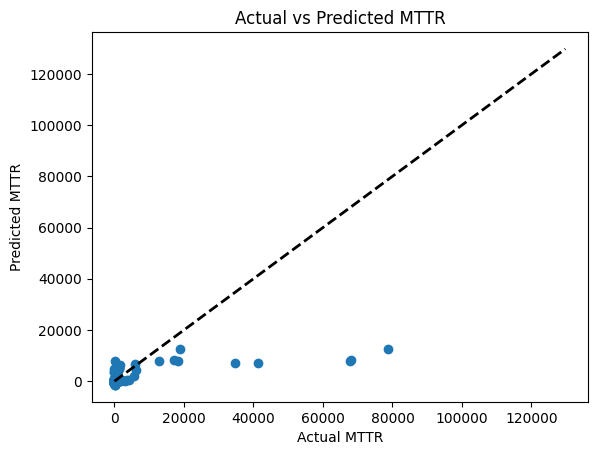

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the data
file_path = 'Final_Tickets.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Step 2: Prepare the data
target_variable = 'MTTR'  # Replace with the actual column name for MTTR
X = data.drop(columns=[target_variable])  # Predictor variables
y = data[target_variable]  # Target variable

# Step 3: Filter out MTTR values greater than 2000
# mask = y >= 3000
# X = X[mask]
# y = y[mask]

# Step 4: Handle missing values
# Keep only numeric columns
X = X.select_dtypes(include=[np.number])  # Retain only numeric columns
X.fillna(X.mean(), inplace=True)  # Fill missing values with mean
y.fillna(y.mean(), inplace=True)  # Fill target variable with mean

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

# Step 9: Visualize the results (optional)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual MTTR')
plt.ylabel('Predicted MTTR')
plt.title('Actual vs Predicted MTTR')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line
plt.show()


### prediction base on Dicision Tree

Root Mean Squared Error: 3445.57
R-squared: 0.31


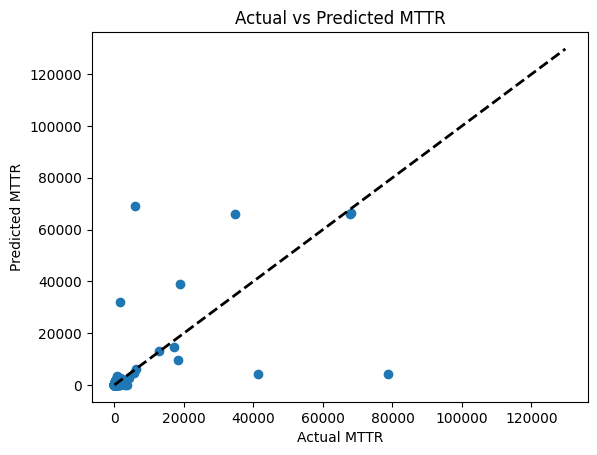

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the data
file_path = 'Final_Tickets.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Step 2: Prepare the data
target_variable = 'MTTR'  # Replace with the actual column name for MTTR
X = data.drop(columns=[target_variable])  # Predictor variables
y = data[target_variable]  # Target variable


# Step 4: Handle missing values
# Keep only numeric columns
X = X.select_dtypes(include=[np.number])  # Retain only numeric columns
X.fillna(X.mean(), inplace=True)  # Fill missing values with mean
y.fillna(y.mean(), inplace=True)  # Fill target variable with mean

# Step 3: Filter MTTR values between 1000 and 5000
# mask = (y >= 0) & (y <= 2000)
# X = X[mask]
# y = y[mask]

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

# Step 9: Visualize the results (optional)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual MTTR')
plt.ylabel('Predicted MTTR')
plt.title('Actual vs Predicted MTTR')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line
plt.show()


### prediction base on Random Forest

Root Mean Squared Error: 2281.52
R-squared: 0.70


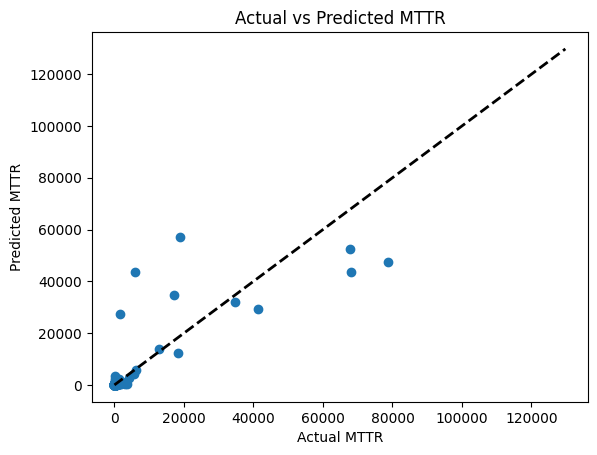

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the data
file_path = 'Final_Tickets.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Step 2: Prepare the data
target_variable = 'MTTR'  # Replace with the actual column name for MTTR
X = data.drop(columns=[target_variable])  # Predictor variables
y = data[target_variable]  # Target variable

# Step 3: Filter MTTR values between 1000 and 5000
# mask = (y >= 2000) & (y <= 200000)
# X = X[mask]
# y = y[mask]

# Step 4: Handle missing values
# Keep only numeric columns
X = X.select_dtypes(include=[np.number])  # Retain only numeric columns
X.fillna(X.mean(), inplace=True)  # Fill missing values with mean
y.fillna(y.mean(), inplace=True)  # Fill target variable with mean

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

# Step 9: Visualize the results (optional)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual MTTR')
plt.ylabel('Predicted MTTR')
plt.title('Actual vs Predicted MTTR')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line
plt.show()


### Fnding best parameters for the data


Best Model Parameters: {'n_estimators': 80, 'random_state': 75}
Best RMSE: 930.34
Best R-squared: 0.86


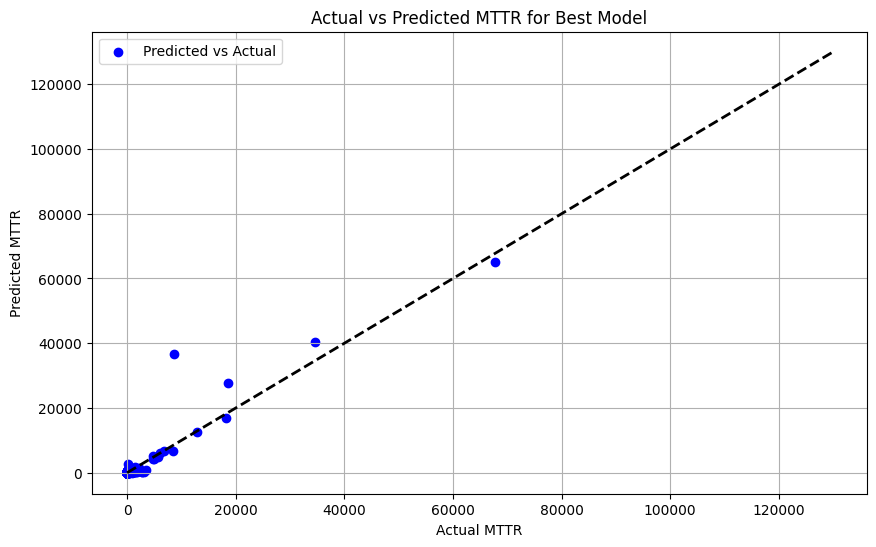

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Step 1: Load the data
file_path = 'Final_Tickets.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Step 2: Prepare the data
target_variable = 'MTTR'  # Replace with the actual column name for MTTR
X = data.drop(columns=[target_variable])  # Predictor variables
y = data[target_variable]  # Target variable

# # Step 3: Filter MTTR values between 1000 and 5000
# mask = (y >= 1000) & (y <= 5000)
# X = X[mask]
# y = y[mask]

# Step 4: Handle missing values
X = X.select_dtypes(include=[np.number])  # Retain only numeric columns
X.fillna(X.mean(), inplace=True)  # Fill missing values with mean
y.fillna(y.mean(), inplace=True)  # Fill target variable with mean

# Step 5: Identify categorical columns and encode them
categorical_cols = X.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    encoder = OneHotEncoder(sparse=False, drop='first')  # Drop first to avoid dummy variable trap
    encoded_categorical = encoder.fit_transform(X[categorical_cols])
    encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))

    # Drop original categorical columns and concatenate the encoded ones
    X = X.drop(columns=categorical_cols)
    X = pd.concat([X.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Initialize variables to track the best model
best_rmse = float('inf')
best_r2 = float('-inf')
best_params = {}
best_y_pred = None
best_y_test = None

# Step 6: Try different n_estimators and random_state
for n_estimators in range(20, 101, 10):  # 20 to 100 with a step of 10
    for random_state in range(42, 101, 3):  # 42 to 100 with a step of 3
        # Step 7: Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

        # Step 8: Train the Random Forest model
        model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
        model.fit(X_train, y_train)

        # Step 9: Make predictions
        y_pred = model.predict(X_test)

        # Step 10: Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # print(f'n_estimators: {n_estimators}, random_state: {random_state}')
        # print(f'Root Mean Squared Error: {rmse:.2f}')
        # print(f'R-squared: {r2:.2f}')

        # Check if this model is the best one so far
        if rmse < best_rmse:
            best_rmse = rmse
            best_r2 = r2
            best_params = {'n_estimators': n_estimators, 'random_state': random_state}
            best_y_pred = y_pred  # Store predictions
            best_y_test = y_test  # Store actual values

# Print the best model parameters and performance
print(f'\nBest Model Parameters: {best_params}')
print(f'Best RMSE: {best_rmse:.2f}')
print(f'Best R-squared: {best_r2:.2f}')

# Step 11: Plot the best predictions
plt.figure(figsize=(10, 6))
plt.scatter(best_y_test, best_y_pred, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual MTTR')
plt.ylabel('Predicted MTTR')
plt.title('Actual vs Predicted MTTR for Best Model')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line
plt.legend()
plt.grid()
plt.show()

## XGBOOST model

In [ ]:
pip install xgboost

In [ ]:
# Import necessary libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# Specify the target variable
target_column = 'MTTR'  # Replace with the name of your target column

# Select specific columns for features (X)
X = data[['CODESITE_encoded', 'lat', 'long', 'elevation', 'Quantized Time Index',
           'MTBRTC_USER_encoded', 'Alarm_Type_encoded', 'FAULTLEVEL_encoded',
           'Affected_encoded', 'PRODUCT_TYPE_encoded', 'orginator group_encoded',
           'OPERATORNAMEPROVINCE_encoded', 'SUBCAUSE_encoded', 'ROOTCAUSE_encoded']]  # Specify the columns you want to include in X
y = data[target_column]  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the XGBoost Regressor
xgb_reg = xgb.XGBRegressor(random_state=42)

# Train the model on the training dataset
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Evaluate the model using various metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared Score: {r2}')

Mean Squared Error: 17063921.697586525
Mean Absolute Error: 593.7077655876567
R-squared Score: 0.003057465427559136


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Initialize the XGBoost Regressor
xgb_reg = xgb.XGBRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid,
                           scoring='r2', cv=3, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Train the model with the best parameters
best_xgb_reg = grid_search.best_estimator_
best_xgb_reg.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = best_xgb_reg.predict(X_test)

# Evaluate the model using various metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared Score: {r2}')

Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}
Mean Squared Error: 7234734.863438698
Mean Absolute Error: 439.3843479674143
R-squared Score: 0.5773178616533203


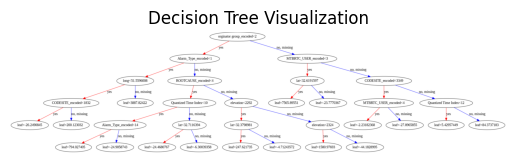

In [ ]:
# Plot the first tree
xgb.plot_tree(best_xgb_reg, num_trees=5)
plt.title("Decision Tree Visualization")
plt.show()

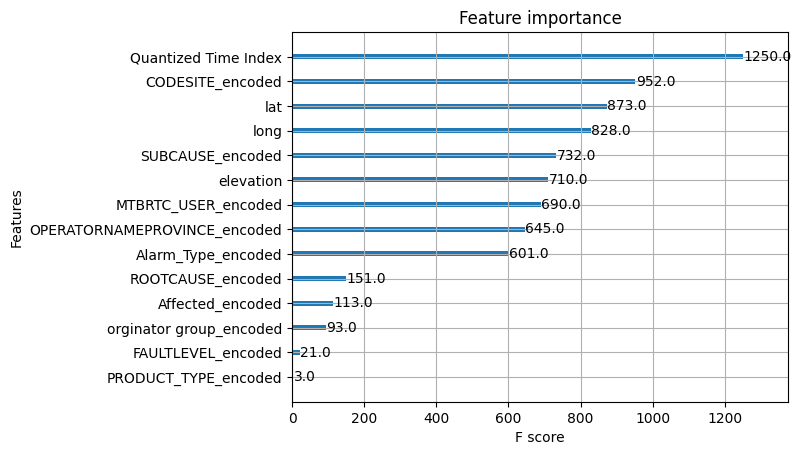

In [ ]:
# Plot feature importance
xgb.plot_importance(best_xgb_reg)
plt.show()